In [29]:
import os
from os import path

import detectree as dtr
import geopandas as gpd
import rasterio as rio
from rasterio import merge, plot

import fiona
from pyproj import Transformer
import rasterio.mask

In [ ]:
# select the training tiles from the tiled aerial imagery dataset
ts = dtr.TrainingSelector(img_dir='data', img_filename_pattern='m_*.tif')
split_df = ts.train_test_split(method='cluster-I')


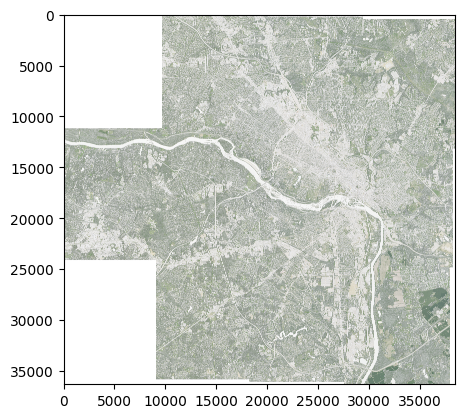

In [6]:
# full 5gb tif, merged from e.g. m_3707728_ne_18_060_20210910.tif etc
with rio.open('data/USDA NAIP imagery.0.tif') as src:
    to_crs = src.crs
    rio.plot.show(src.read())

In [38]:
# Crop the huge image to city borders
ric_borders = gpd.read_file("../data/RIC/ric_borders.geojson").to_crs(to_crs)

In [40]:
with rasterio.open('data/USDA NAIP imagery.0.tif') as src:
    out_image, out_transform = rasterio.mask.mask(src, ric_borders.geometry, crop=True)
    out_meta = src.meta
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
with rasterio.open("data/NAIP_2021.RIC_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

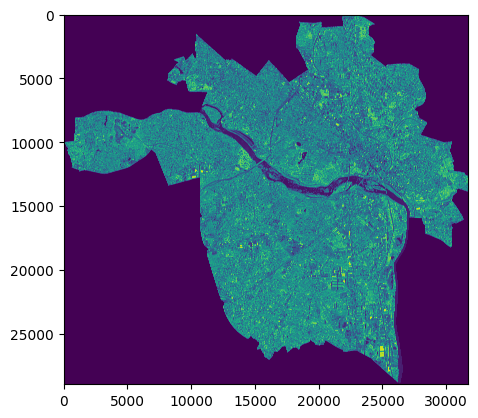

In [42]:
# verify that it's trimmed to the city boundaries
with rio.open("data/NAIP_2021.RIC_masked.tif") as src:
    rio.plot.show(src.read())

In [48]:
dtr.split_into_tiles("data/NAIP_2021.RIC_masked.tif", "tiles/")

28it [00:00, 68.97it/s]

Dumped tile to tiles/tile_0-9728.tif
Dumped tile to tiles/tile_0-10240.tif
Dumped tile to tiles/tile_0-10752.tif
Dumped tile to tiles/tile_0-11264.tif


82it [00:01, 62.90it/s]

Dumped tile to tiles/tile_512-7680.tif
Dumped tile to tiles/tile_512-8192.tif
Dumped tile to tiles/tile_512-8704.tif
Dumped tile to tiles/tile_512-9216.tif
Dumped tile to tiles/tile_512-9728.tif
Dumped tile to tiles/tile_512-10240.tif
Dumped tile to tiles/tile_512-10752.tif
Dumped tile to tiles/tile_512-11264.tif
Dumped tile to tiles/tile_512-11776.tif


139it [00:02, 70.13it/s]

Dumped tile to tiles/tile_1024-7680.tif
Dumped tile to tiles/tile_1024-8192.tif
Dumped tile to tiles/tile_1024-8704.tif
Dumped tile to tiles/tile_1024-9216.tif
Dumped tile to tiles/tile_1024-9728.tif
Dumped tile to tiles/tile_1024-10240.tif
Dumped tile to tiles/tile_1024-10752.tif
Dumped tile to tiles/tile_1024-11264.tif
Dumped tile to tiles/tile_1024-11776.tif
Dumped tile to tiles/tile_1024-12288.tif


198it [00:02, 72.44it/s]

Dumped tile to tiles/tile_1536-7680.tif
Dumped tile to tiles/tile_1536-8192.tif
Dumped tile to tiles/tile_1536-8704.tif
Dumped tile to tiles/tile_1536-9216.tif
Dumped tile to tiles/tile_1536-9728.tif
Dumped tile to tiles/tile_1536-10240.tif
Dumped tile to tiles/tile_1536-10752.tif
Dumped tile to tiles/tile_1536-11264.tif
Dumped tile to tiles/tile_1536-11776.tif
Dumped tile to tiles/tile_1536-12288.tif


249it [00:03, 72.83it/s]

Dumped tile to tiles/tile_2048-7168.tif
Dumped tile to tiles/tile_2048-7680.tif
Dumped tile to tiles/tile_2048-8192.tif
Dumped tile to tiles/tile_2048-8704.tif
Dumped tile to tiles/tile_2048-9216.tif
Dumped tile to tiles/tile_2048-9728.tif
Dumped tile to tiles/tile_2048-10240.tif
Dumped tile to tiles/tile_2048-10752.tif
Dumped tile to tiles/tile_2048-11264.tif
Dumped tile to tiles/tile_2048-11776.tif
Dumped tile to tiles/tile_2048-12288.tif


305it [00:04, 70.53it/s]

Dumped tile to tiles/tile_2560-7168.tif
Dumped tile to tiles/tile_2560-7680.tif
Dumped tile to tiles/tile_2560-8192.tif
Dumped tile to tiles/tile_2560-8704.tif
Dumped tile to tiles/tile_2560-9216.tif
Dumped tile to tiles/tile_2560-9728.tif
Dumped tile to tiles/tile_2560-10240.tif
Dumped tile to tiles/tile_2560-10752.tif
Dumped tile to tiles/tile_2560-11264.tif
Dumped tile to tiles/tile_2560-11776.tif
Dumped tile to tiles/tile_2560-12288.tif


364it [00:05, 72.60it/s]

Dumped tile to tiles/tile_3072-7168.tif
Dumped tile to tiles/tile_3072-7680.tif
Dumped tile to tiles/tile_3072-8192.tif
Dumped tile to tiles/tile_3072-8704.tif
Dumped tile to tiles/tile_3072-9216.tif
Dumped tile to tiles/tile_3072-9728.tif
Dumped tile to tiles/tile_3072-10240.tif
Dumped tile to tiles/tile_3072-10752.tif
Dumped tile to tiles/tile_3072-11264.tif
Dumped tile to tiles/tile_3072-11776.tif
Dumped tile to tiles/tile_3072-12288.tif


420it [00:05, 70.52it/s]

Dumped tile to tiles/tile_3584-7168.tif
Dumped tile to tiles/tile_3584-7680.tif
Dumped tile to tiles/tile_3584-8192.tif
Dumped tile to tiles/tile_3584-8704.tif
Dumped tile to tiles/tile_3584-9216.tif
Dumped tile to tiles/tile_3584-9728.tif
Dumped tile to tiles/tile_3584-10240.tif
Dumped tile to tiles/tile_3584-10752.tif
Dumped tile to tiles/tile_3584-11264.tif
Dumped tile to tiles/tile_3584-11776.tif
Dumped tile to tiles/tile_3584-12288.tif


477it [00:06, 70.56it/s]

Dumped tile to tiles/tile_4096-7680.tif
Dumped tile to tiles/tile_4096-8192.tif
Dumped tile to tiles/tile_4096-8704.tif
Dumped tile to tiles/tile_4096-9216.tif
Dumped tile to tiles/tile_4096-9728.tif
Dumped tile to tiles/tile_4096-10240.tif
Dumped tile to tiles/tile_4096-10752.tif
Dumped tile to tiles/tile_4096-11264.tif
Dumped tile to tiles/tile_4096-11776.tif
Dumped tile to tiles/tile_4096-12288.tif


541it [00:07, 69.06it/s]

Dumped tile to tiles/tile_4608-7680.tif
Dumped tile to tiles/tile_4608-8192.tif
Dumped tile to tiles/tile_4608-8704.tif
Dumped tile to tiles/tile_4608-9216.tif
Dumped tile to tiles/tile_4608-9728.tif
Dumped tile to tiles/tile_4608-10240.tif
Dumped tile to tiles/tile_4608-10752.tif
Dumped tile to tiles/tile_4608-11264.tif
Dumped tile to tiles/tile_4608-11776.tif


592it [00:08, 72.28it/s]

Dumped tile to tiles/tile_5120-7680.tif
Dumped tile to tiles/tile_5120-8192.tif
Dumped tile to tiles/tile_5120-8704.tif
Dumped tile to tiles/tile_5120-9216.tif
Dumped tile to tiles/tile_5120-9728.tif
Dumped tile to tiles/tile_5120-10240.tif
Dumped tile to tiles/tile_5120-10752.tif
Dumped tile to tiles/tile_5120-11264.tif
Dumped tile to tiles/tile_5120-11776.tif


656it [00:09, 70.42it/s]

Dumped tile to tiles/tile_5632-8192.tif
Dumped tile to tiles/tile_5632-8704.tif
Dumped tile to tiles/tile_5632-9216.tif
Dumped tile to tiles/tile_5632-9728.tif
Dumped tile to tiles/tile_5632-10240.tif
Dumped tile to tiles/tile_5632-10752.tif
Dumped tile to tiles/tile_5632-11264.tif


712it [00:09, 68.58it/s]

Dumped tile to tiles/tile_6144-7680.tif
Dumped tile to tiles/tile_6144-8192.tif
Dumped tile to tiles/tile_6144-8704.tif
Dumped tile to tiles/tile_6144-9216.tif
Dumped tile to tiles/tile_6144-9728.tif
Dumped tile to tiles/tile_6144-10240.tif
Dumped tile to tiles/tile_6144-10752.tif
Dumped tile to tiles/tile_6144-11264.tif


770it [00:10, 74.90it/s]

Dumped tile to tiles/tile_6656-7680.tif
Dumped tile to tiles/tile_6656-8192.tif
Dumped tile to tiles/tile_6656-8704.tif
Dumped tile to tiles/tile_6656-9216.tif
Dumped tile to tiles/tile_6656-9728.tif
Dumped tile to tiles/tile_6656-10240.tif
Dumped tile to tiles/tile_6656-10752.tif


822it [00:11, 72.51it/s]

Dumped tile to tiles/tile_7168-7168.tif
Dumped tile to tiles/tile_7168-7680.tif
Dumped tile to tiles/tile_7168-8192.tif
Dumped tile to tiles/tile_7168-8704.tif
Dumped tile to tiles/tile_7168-9216.tif
Dumped tile to tiles/tile_7168-9728.tif
Dumped tile to tiles/tile_7168-10240.tif
Dumped tile to tiles/tile_7168-10752.tif
Dumped tile to tiles/tile_7168-11264.tif
Dumped tile to tiles/tile_7168-11776.tif


872it [00:11, 73.36it/s]

Dumped tile to tiles/tile_7680-4608.tif
Dumped tile to tiles/tile_7680-5120.tif
Dumped tile to tiles/tile_7680-7168.tif
Dumped tile to tiles/tile_7680-7680.tif
Dumped tile to tiles/tile_7680-8192.tif
Dumped tile to tiles/tile_7680-8704.tif
Dumped tile to tiles/tile_7680-9216.tif
Dumped tile to tiles/tile_7680-9728.tif
Dumped tile to tiles/tile_7680-10240.tif
Dumped tile to tiles/tile_7680-10752.tif


888it [00:12, 69.74it/s]

Dumped tile to tiles/tile_7680-11264.tif
Dumped tile to tiles/tile_7680-11776.tif
Dumped tile to tiles/tile_7680-12288.tif
Dumped tile to tiles/tile_7680-12800.tif
Dumped tile to tiles/tile_7680-13312.tif


930it [00:12, 72.07it/s]

Dumped tile to tiles/tile_8192-3072.tif
Dumped tile to tiles/tile_8192-3584.tif
Dumped tile to tiles/tile_8192-4096.tif
Dumped tile to tiles/tile_8192-4608.tif
Dumped tile to tiles/tile_8192-5120.tif
Dumped tile to tiles/tile_8192-7168.tif
Dumped tile to tiles/tile_8192-7680.tif
Dumped tile to tiles/tile_8192-8192.tif
Dumped tile to tiles/tile_8192-8704.tif
Dumped tile to tiles/tile_8192-9216.tif


938it [00:12, 68.16it/s]

Dumped tile to tiles/tile_8192-9728.tif
Dumped tile to tiles/tile_8192-10240.tif
Dumped tile to tiles/tile_8192-10752.tif
Dumped tile to tiles/tile_8192-11264.tif
Dumped tile to tiles/tile_8192-11776.tif
Dumped tile to tiles/tile_8192-12288.tif
Dumped tile to tiles/tile_8192-12800.tif
Dumped tile to tiles/tile_8192-13312.tif


988it [00:13, 71.16it/s]

Dumped tile to tiles/tile_8704-3072.tif
Dumped tile to tiles/tile_8704-3584.tif
Dumped tile to tiles/tile_8704-4096.tif
Dumped tile to tiles/tile_8704-4608.tif
Dumped tile to tiles/tile_8704-5120.tif
Dumped tile to tiles/tile_8704-7168.tif
Dumped tile to tiles/tile_8704-7680.tif
Dumped tile to tiles/tile_8704-8192.tif
Dumped tile to tiles/tile_8704-8704.tif
Dumped tile to tiles/tile_8704-9216.tif


996it [00:13, 68.49it/s]

Dumped tile to tiles/tile_8704-9728.tif
Dumped tile to tiles/tile_8704-10240.tif
Dumped tile to tiles/tile_8704-10752.tif
Dumped tile to tiles/tile_8704-11264.tif
Dumped tile to tiles/tile_8704-11776.tif
Dumped tile to tiles/tile_8704-12288.tif
Dumped tile to tiles/tile_8704-12800.tif


1039it [00:14, 73.26it/s]

Dumped tile to tiles/tile_9216-3072.tif
Dumped tile to tiles/tile_9216-3584.tif
Dumped tile to tiles/tile_9216-4096.tif
Dumped tile to tiles/tile_9216-4608.tif
Dumped tile to tiles/tile_9216-5120.tif
Dumped tile to tiles/tile_9216-5632.tif
Dumped tile to tiles/tile_9216-7168.tif
Dumped tile to tiles/tile_9216-7680.tif
Dumped tile to tiles/tile_9216-8192.tif
Dumped tile to tiles/tile_9216-8704.tif
Dumped tile to tiles/tile_9216-9216.tif


1055it [00:14, 68.47it/s]

Dumped tile to tiles/tile_9216-9728.tif
Dumped tile to tiles/tile_9216-10240.tif
Dumped tile to tiles/tile_9216-10752.tif
Dumped tile to tiles/tile_9216-11264.tif
Dumped tile to tiles/tile_9216-11776.tif
Dumped tile to tiles/tile_9216-12288.tif
Dumped tile to tiles/tile_9216-12800.tif


1098it [00:15, 73.11it/s]

Dumped tile to tiles/tile_9728-3072.tif
Dumped tile to tiles/tile_9728-3584.tif
Dumped tile to tiles/tile_9728-4096.tif
Dumped tile to tiles/tile_9728-4608.tif
Dumped tile to tiles/tile_9728-5120.tif
Dumped tile to tiles/tile_9728-5632.tif
Dumped tile to tiles/tile_9728-7680.tif
Dumped tile to tiles/tile_9728-8192.tif
Dumped tile to tiles/tile_9728-8704.tif
Dumped tile to tiles/tile_9728-9216.tif


1113it [00:15, 69.12it/s]

Dumped tile to tiles/tile_9728-9728.tif
Dumped tile to tiles/tile_9728-10240.tif
Dumped tile to tiles/tile_9728-10752.tif
Dumped tile to tiles/tile_9728-11264.tif
Dumped tile to tiles/tile_9728-11776.tif
Dumped tile to tiles/tile_9728-12288.tif
Dumped tile to tiles/tile_9728-12800.tif


1155it [00:15, 71.56it/s]

Dumped tile to tiles/tile_10240-1536.tif
Dumped tile to tiles/tile_10240-2048.tif
Dumped tile to tiles/tile_10240-2560.tif
Dumped tile to tiles/tile_10240-3072.tif
Dumped tile to tiles/tile_10240-3584.tif
Dumped tile to tiles/tile_10240-4096.tif
Dumped tile to tiles/tile_10240-4608.tif
Dumped tile to tiles/tile_10240-5120.tif
Dumped tile to tiles/tile_10240-5632.tif
Dumped tile to tiles/tile_10240-7168.tif
Dumped tile to tiles/tile_10240-7680.tif


1163it [00:16, 68.07it/s]

Dumped tile to tiles/tile_10240-8192.tif
Dumped tile to tiles/tile_10240-8704.tif
Dumped tile to tiles/tile_10240-9216.tif
Dumped tile to tiles/tile_10240-9728.tif
Dumped tile to tiles/tile_10240-10240.tif
Dumped tile to tiles/tile_10240-10752.tif
Dumped tile to tiles/tile_10240-11264.tif
Dumped tile to tiles/tile_10240-11776.tif
Dumped tile to tiles/tile_10240-12288.tif
Dumped tile to tiles/tile_10240-12800.tif
Dumped tile to tiles/tile_10240-13312.tif
Dumped tile to tiles/tile_10240-13824.tif
Dumped tile to tiles/tile_10240-14336.tif


1178it [00:16, 67.88it/s]

Dumped tile to tiles/tile_10240-14848.tif
Dumped tile to tiles/tile_10240-15360.tif
Dumped tile to tiles/tile_10240-15872.tif
Dumped tile to tiles/tile_10240-16384.tif
Dumped tile to tiles/tile_10240-16896.tif


1211it [00:16, 69.68it/s]

Dumped tile to tiles/tile_10752-1536.tif
Dumped tile to tiles/tile_10752-2048.tif
Dumped tile to tiles/tile_10752-2560.tif
Dumped tile to tiles/tile_10752-3072.tif
Dumped tile to tiles/tile_10752-3584.tif
Dumped tile to tiles/tile_10752-4096.tif
Dumped tile to tiles/tile_10752-4608.tif
Dumped tile to tiles/tile_10752-5120.tif
Dumped tile to tiles/tile_10752-5632.tif
Dumped tile to tiles/tile_10752-6144.tif
Dumped tile to tiles/tile_10752-6656.tif
Dumped tile to tiles/tile_10752-7168.tif
Dumped tile to tiles/tile_10752-7680.tif


1226it [00:16, 65.34it/s]

Dumped tile to tiles/tile_10752-8192.tif
Dumped tile to tiles/tile_10752-8704.tif
Dumped tile to tiles/tile_10752-9216.tif
Dumped tile to tiles/tile_10752-9728.tif
Dumped tile to tiles/tile_10752-10240.tif
Dumped tile to tiles/tile_10752-10752.tif
Dumped tile to tiles/tile_10752-11264.tif
Dumped tile to tiles/tile_10752-11776.tif
Dumped tile to tiles/tile_10752-12288.tif
Dumped tile to tiles/tile_10752-12800.tif
Dumped tile to tiles/tile_10752-13312.tif
Dumped tile to tiles/tile_10752-13824.tif
Dumped tile to tiles/tile_10752-14336.tif


1241it [00:17, 67.85it/s]

Dumped tile to tiles/tile_10752-14848.tif
Dumped tile to tiles/tile_10752-15360.tif
Dumped tile to tiles/tile_10752-15872.tif
Dumped tile to tiles/tile_10752-16384.tif
Dumped tile to tiles/tile_10752-16896.tif
Dumped tile to tiles/tile_10752-17408.tif
Dumped tile to tiles/tile_10752-17920.tif
Dumped tile to tiles/tile_10752-18432.tif
Dumped tile to tiles/tile_10752-18944.tif


1266it [00:17, 68.96it/s]

Dumped tile to tiles/tile_11264-2048.tif
Dumped tile to tiles/tile_11264-2560.tif
Dumped tile to tiles/tile_11264-3072.tif
Dumped tile to tiles/tile_11264-3584.tif
Dumped tile to tiles/tile_11264-4096.tif
Dumped tile to tiles/tile_11264-4608.tif
Dumped tile to tiles/tile_11264-5120.tif
Dumped tile to tiles/tile_11264-5632.tif
Dumped tile to tiles/tile_11264-6144.tif
Dumped tile to tiles/tile_11264-6656.tif
Dumped tile to tiles/tile_11264-7168.tif
Dumped tile to tiles/tile_11264-7680.tif
Dumped tile to tiles/tile_11264-8192.tif


1280it [00:17, 64.05it/s]

Dumped tile to tiles/tile_11264-8704.tif
Dumped tile to tiles/tile_11264-9216.tif
Dumped tile to tiles/tile_11264-9728.tif
Dumped tile to tiles/tile_11264-10240.tif
Dumped tile to tiles/tile_11264-10752.tif
Dumped tile to tiles/tile_11264-11264.tif
Dumped tile to tiles/tile_11264-11776.tif
Dumped tile to tiles/tile_11264-12288.tif
Dumped tile to tiles/tile_11264-12800.tif
Dumped tile to tiles/tile_11264-13312.tif
Dumped tile to tiles/tile_11264-13824.tif
Dumped tile to tiles/tile_11264-14336.tif
Dumped tile to tiles/tile_11264-14848.tif


1294it [00:17, 63.26it/s]

Dumped tile to tiles/tile_11264-15360.tif
Dumped tile to tiles/tile_11264-15872.tif
Dumped tile to tiles/tile_11264-16384.tif
Dumped tile to tiles/tile_11264-16896.tif
Dumped tile to tiles/tile_11264-17408.tif
Dumped tile to tiles/tile_11264-17920.tif
Dumped tile to tiles/tile_11264-18432.tif
Dumped tile to tiles/tile_11264-18944.tif
Dumped tile to tiles/tile_11264-19456.tif
Dumped tile to tiles/tile_11264-19968.tif
Dumped tile to tiles/tile_11264-20480.tif


1326it [00:18, 67.79it/s]

Dumped tile to tiles/tile_11776-2560.tif
Dumped tile to tiles/tile_11776-3072.tif
Dumped tile to tiles/tile_11776-3584.tif
Dumped tile to tiles/tile_11776-4096.tif
Dumped tile to tiles/tile_11776-4608.tif
Dumped tile to tiles/tile_11776-5120.tif
Dumped tile to tiles/tile_11776-5632.tif
Dumped tile to tiles/tile_11776-6144.tif
Dumped tile to tiles/tile_11776-6656.tif
Dumped tile to tiles/tile_11776-7168.tif
Dumped tile to tiles/tile_11776-7680.tif
Dumped tile to tiles/tile_11776-8192.tif
Dumped tile to tiles/tile_11776-8704.tif


1340it [00:18, 64.21it/s]

Dumped tile to tiles/tile_11776-9216.tif
Dumped tile to tiles/tile_11776-9728.tif
Dumped tile to tiles/tile_11776-10240.tif
Dumped tile to tiles/tile_11776-10752.tif
Dumped tile to tiles/tile_11776-11264.tif
Dumped tile to tiles/tile_11776-11776.tif
Dumped tile to tiles/tile_11776-12288.tif
Dumped tile to tiles/tile_11776-12800.tif
Dumped tile to tiles/tile_11776-13312.tif
Dumped tile to tiles/tile_11776-13824.tif
Dumped tile to tiles/tile_11776-14336.tif
Dumped tile to tiles/tile_11776-14848.tif
Dumped tile to tiles/tile_11776-15360.tif


1354it [00:18, 64.16it/s]

Dumped tile to tiles/tile_11776-15872.tif
Dumped tile to tiles/tile_11776-16384.tif
Dumped tile to tiles/tile_11776-16896.tif
Dumped tile to tiles/tile_11776-17408.tif
Dumped tile to tiles/tile_11776-17920.tif
Dumped tile to tiles/tile_11776-18432.tif
Dumped tile to tiles/tile_11776-18944.tif
Dumped tile to tiles/tile_11776-19456.tif
Dumped tile to tiles/tile_11776-19968.tif
Dumped tile to tiles/tile_11776-20480.tif
Dumped tile to tiles/tile_11776-20992.tif
Dumped tile to tiles/tile_11776-21504.tif
Dumped tile to tiles/tile_11776-22016.tif


1387it [00:19, 67.26it/s]

Dumped tile to tiles/tile_12288-3072.tif
Dumped tile to tiles/tile_12288-3584.tif
Dumped tile to tiles/tile_12288-4096.tif
Dumped tile to tiles/tile_12288-4608.tif
Dumped tile to tiles/tile_12288-5120.tif
Dumped tile to tiles/tile_12288-5632.tif
Dumped tile to tiles/tile_12288-6144.tif
Dumped tile to tiles/tile_12288-6656.tif
Dumped tile to tiles/tile_12288-7168.tif
Dumped tile to tiles/tile_12288-7680.tif
Dumped tile to tiles/tile_12288-8192.tif
Dumped tile to tiles/tile_12288-8704.tif
Dumped tile to tiles/tile_12288-9216.tif


1394it [00:19, 65.38it/s]

Dumped tile to tiles/tile_12288-9728.tif
Dumped tile to tiles/tile_12288-10240.tif
Dumped tile to tiles/tile_12288-10752.tif
Dumped tile to tiles/tile_12288-11264.tif
Dumped tile to tiles/tile_12288-11776.tif
Dumped tile to tiles/tile_12288-12288.tif
Dumped tile to tiles/tile_12288-12800.tif
Dumped tile to tiles/tile_12288-13312.tif
Dumped tile to tiles/tile_12288-13824.tif
Dumped tile to tiles/tile_12288-14336.tif
Dumped tile to tiles/tile_12288-14848.tif
Dumped tile to tiles/tile_12288-15360.tif
Dumped tile to tiles/tile_12288-15872.tif


1408it [00:19, 63.47it/s]

Dumped tile to tiles/tile_12288-16384.tif
Dumped tile to tiles/tile_12288-16896.tif
Dumped tile to tiles/tile_12288-17408.tif
Dumped tile to tiles/tile_12288-17920.tif
Dumped tile to tiles/tile_12288-18432.tif
Dumped tile to tiles/tile_12288-18944.tif
Dumped tile to tiles/tile_12288-19456.tif
Dumped tile to tiles/tile_12288-19968.tif
Dumped tile to tiles/tile_12288-20480.tif
Dumped tile to tiles/tile_12288-20992.tif
Dumped tile to tiles/tile_12288-21504.tif
Dumped tile to tiles/tile_12288-22016.tif
Dumped tile to tiles/tile_12288-22528.tif


1423it [00:19, 66.69it/s]

Dumped tile to tiles/tile_12288-23040.tif
Dumped tile to tiles/tile_12288-23552.tif


1440it [00:20, 66.69it/s]

Dumped tile to tiles/tile_12800-3072.tif
Dumped tile to tiles/tile_12800-3584.tif
Dumped tile to tiles/tile_12800-4096.tif
Dumped tile to tiles/tile_12800-4608.tif
Dumped tile to tiles/tile_12800-5120.tif
Dumped tile to tiles/tile_12800-5632.tif
Dumped tile to tiles/tile_12800-6144.tif
Dumped tile to tiles/tile_12800-6656.tif
Dumped tile to tiles/tile_12800-7168.tif
Dumped tile to tiles/tile_12800-7680.tif
Dumped tile to tiles/tile_12800-8192.tif
Dumped tile to tiles/tile_12800-8704.tif


1454it [00:20, 62.90it/s]

Dumped tile to tiles/tile_12800-9216.tif
Dumped tile to tiles/tile_12800-9728.tif
Dumped tile to tiles/tile_12800-10240.tif
Dumped tile to tiles/tile_12800-10752.tif
Dumped tile to tiles/tile_12800-11264.tif
Dumped tile to tiles/tile_12800-11776.tif
Dumped tile to tiles/tile_12800-12288.tif
Dumped tile to tiles/tile_12800-12800.tif
Dumped tile to tiles/tile_12800-13312.tif
Dumped tile to tiles/tile_12800-13824.tif
Dumped tile to tiles/tile_12800-14336.tif
Dumped tile to tiles/tile_12800-14848.tif


1468it [00:20, 62.39it/s]

Dumped tile to tiles/tile_12800-15360.tif
Dumped tile to tiles/tile_12800-15872.tif
Dumped tile to tiles/tile_12800-16384.tif
Dumped tile to tiles/tile_12800-16896.tif
Dumped tile to tiles/tile_12800-17408.tif
Dumped tile to tiles/tile_12800-17920.tif
Dumped tile to tiles/tile_12800-18432.tif
Dumped tile to tiles/tile_12800-18944.tif
Dumped tile to tiles/tile_12800-19456.tif
Dumped tile to tiles/tile_12800-19968.tif
Dumped tile to tiles/tile_12800-20480.tif
Dumped tile to tiles/tile_12800-20992.tif
Dumped tile to tiles/tile_12800-21504.tif


1475it [00:20, 61.90it/s]

Dumped tile to tiles/tile_12800-22016.tif
Dumped tile to tiles/tile_12800-22528.tif
Dumped tile to tiles/tile_12800-23040.tif
Dumped tile to tiles/tile_12800-23552.tif
Dumped tile to tiles/tile_12800-24064.tif
Dumped tile to tiles/tile_12800-24576.tif


1499it [00:21, 66.26it/s]

Dumped tile to tiles/tile_13312-3584.tif
Dumped tile to tiles/tile_13312-4096.tif
Dumped tile to tiles/tile_13312-4608.tif
Dumped tile to tiles/tile_13312-5120.tif
Dumped tile to tiles/tile_13312-5632.tif
Dumped tile to tiles/tile_13312-6144.tif
Dumped tile to tiles/tile_13312-6656.tif
Dumped tile to tiles/tile_13312-7168.tif
Dumped tile to tiles/tile_13312-7680.tif
Dumped tile to tiles/tile_13312-8192.tif
Dumped tile to tiles/tile_13312-8704.tif
Dumped tile to tiles/tile_13312-9216.tif
Dumped tile to tiles/tile_13312-9728.tif


1513it [00:21, 63.45it/s]

Dumped tile to tiles/tile_13312-10240.tif
Dumped tile to tiles/tile_13312-10752.tif
Dumped tile to tiles/tile_13312-11264.tif
Dumped tile to tiles/tile_13312-11776.tif
Dumped tile to tiles/tile_13312-12288.tif
Dumped tile to tiles/tile_13312-12800.tif
Dumped tile to tiles/tile_13312-13312.tif
Dumped tile to tiles/tile_13312-13824.tif
Dumped tile to tiles/tile_13312-14336.tif
Dumped tile to tiles/tile_13312-14848.tif
Dumped tile to tiles/tile_13312-15360.tif
Dumped tile to tiles/tile_13312-15872.tif
Dumped tile to tiles/tile_13312-16384.tif


1527it [00:21, 63.25it/s]

Dumped tile to tiles/tile_13312-16896.tif
Dumped tile to tiles/tile_13312-17408.tif
Dumped tile to tiles/tile_13312-17920.tif
Dumped tile to tiles/tile_13312-18432.tif
Dumped tile to tiles/tile_13312-18944.tif
Dumped tile to tiles/tile_13312-19456.tif
Dumped tile to tiles/tile_13312-19968.tif
Dumped tile to tiles/tile_13312-20480.tif
Dumped tile to tiles/tile_13312-20992.tif
Dumped tile to tiles/tile_13312-21504.tif
Dumped tile to tiles/tile_13312-22016.tif
Dumped tile to tiles/tile_13312-22528.tif
Dumped tile to tiles/tile_13312-23040.tif


1543it [00:21, 69.23it/s]

Dumped tile to tiles/tile_13312-23552.tif
Dumped tile to tiles/tile_13312-24064.tif
Dumped tile to tiles/tile_13312-24576.tif


1557it [00:21, 66.06it/s]

Dumped tile to tiles/tile_13824-3584.tif
Dumped tile to tiles/tile_13824-4096.tif
Dumped tile to tiles/tile_13824-4608.tif
Dumped tile to tiles/tile_13824-5120.tif
Dumped tile to tiles/tile_13824-5632.tif
Dumped tile to tiles/tile_13824-6144.tif
Dumped tile to tiles/tile_13824-6656.tif
Dumped tile to tiles/tile_13824-7168.tif
Dumped tile to tiles/tile_13824-7680.tif
Dumped tile to tiles/tile_13824-8192.tif
Dumped tile to tiles/tile_13824-8704.tif
Dumped tile to tiles/tile_13824-9216.tif
Dumped tile to tiles/tile_13824-9728.tif


1571it [00:22, 63.05it/s]

Dumped tile to tiles/tile_13824-10240.tif
Dumped tile to tiles/tile_13824-10752.tif
Dumped tile to tiles/tile_13824-11264.tif
Dumped tile to tiles/tile_13824-11776.tif
Dumped tile to tiles/tile_13824-12288.tif
Dumped tile to tiles/tile_13824-12800.tif
Dumped tile to tiles/tile_13824-13312.tif
Dumped tile to tiles/tile_13824-13824.tif
Dumped tile to tiles/tile_13824-14336.tif
Dumped tile to tiles/tile_13824-14848.tif
Dumped tile to tiles/tile_13824-15360.tif
Dumped tile to tiles/tile_13824-15872.tif
Dumped tile to tiles/tile_13824-16384.tif


1585it [00:22, 62.62it/s]

Dumped tile to tiles/tile_13824-16896.tif
Dumped tile to tiles/tile_13824-17408.tif
Dumped tile to tiles/tile_13824-17920.tif
Dumped tile to tiles/tile_13824-18432.tif
Dumped tile to tiles/tile_13824-18944.tif
Dumped tile to tiles/tile_13824-19456.tif
Dumped tile to tiles/tile_13824-19968.tif
Dumped tile to tiles/tile_13824-20480.tif
Dumped tile to tiles/tile_13824-20992.tif
Dumped tile to tiles/tile_13824-21504.tif
Dumped tile to tiles/tile_13824-22016.tif
Dumped tile to tiles/tile_13824-22528.tif
Dumped tile to tiles/tile_13824-23040.tif


1592it [00:22, 63.54it/s]

Dumped tile to tiles/tile_13824-23552.tif
Dumped tile to tiles/tile_13824-24064.tif
Dumped tile to tiles/tile_13824-24576.tif
Dumped tile to tiles/tile_13824-25088.tif


1615it [00:22, 65.56it/s]

Dumped tile to tiles/tile_14336-4096.tif
Dumped tile to tiles/tile_14336-4608.tif
Dumped tile to tiles/tile_14336-5120.tif
Dumped tile to tiles/tile_14336-5632.tif
Dumped tile to tiles/tile_14336-6144.tif
Dumped tile to tiles/tile_14336-6656.tif
Dumped tile to tiles/tile_14336-7168.tif
Dumped tile to tiles/tile_14336-7680.tif
Dumped tile to tiles/tile_14336-8192.tif
Dumped tile to tiles/tile_14336-8704.tif
Dumped tile to tiles/tile_14336-9216.tif
Dumped tile to tiles/tile_14336-9728.tif


1629it [00:23, 63.08it/s]

Dumped tile to tiles/tile_14336-10240.tif
Dumped tile to tiles/tile_14336-10752.tif
Dumped tile to tiles/tile_14336-11264.tif
Dumped tile to tiles/tile_14336-11776.tif
Dumped tile to tiles/tile_14336-12288.tif
Dumped tile to tiles/tile_14336-12800.tif
Dumped tile to tiles/tile_14336-13312.tif
Dumped tile to tiles/tile_14336-13824.tif
Dumped tile to tiles/tile_14336-14336.tif
Dumped tile to tiles/tile_14336-14848.tif
Dumped tile to tiles/tile_14336-15360.tif
Dumped tile to tiles/tile_14336-15872.tif
Dumped tile to tiles/tile_14336-16384.tif


1636it [00:23, 62.58it/s]

Dumped tile to tiles/tile_14336-16896.tif
Dumped tile to tiles/tile_14336-17408.tif
Dumped tile to tiles/tile_14336-17920.tif
Dumped tile to tiles/tile_14336-18432.tif
Dumped tile to tiles/tile_14336-18944.tif
Dumped tile to tiles/tile_14336-19456.tif
Dumped tile to tiles/tile_14336-19968.tif
Dumped tile to tiles/tile_14336-20480.tif
Dumped tile to tiles/tile_14336-20992.tif
Dumped tile to tiles/tile_14336-21504.tif
Dumped tile to tiles/tile_14336-22016.tif
Dumped tile to tiles/tile_14336-22528.tif
Dumped tile to tiles/tile_14336-23040.tif


1650it [00:23, 63.94it/s]

Dumped tile to tiles/tile_14336-23552.tif
Dumped tile to tiles/tile_14336-24064.tif
Dumped tile to tiles/tile_14336-24576.tif
Dumped tile to tiles/tile_14336-25088.tif


1673it [00:23, 65.59it/s]

Dumped tile to tiles/tile_14848-4096.tif
Dumped tile to tiles/tile_14848-4608.tif
Dumped tile to tiles/tile_14848-5120.tif
Dumped tile to tiles/tile_14848-5632.tif
Dumped tile to tiles/tile_14848-6144.tif
Dumped tile to tiles/tile_14848-6656.tif
Dumped tile to tiles/tile_14848-7168.tif
Dumped tile to tiles/tile_14848-7680.tif
Dumped tile to tiles/tile_14848-8192.tif
Dumped tile to tiles/tile_14848-8704.tif
Dumped tile to tiles/tile_14848-9216.tif
Dumped tile to tiles/tile_14848-9728.tif
Dumped tile to tiles/tile_14848-10240.tif


1687it [00:23, 63.32it/s]

Dumped tile to tiles/tile_14848-10752.tif
Dumped tile to tiles/tile_14848-11264.tif
Dumped tile to tiles/tile_14848-11776.tif
Dumped tile to tiles/tile_14848-12288.tif
Dumped tile to tiles/tile_14848-12800.tif
Dumped tile to tiles/tile_14848-13312.tif
Dumped tile to tiles/tile_14848-13824.tif
Dumped tile to tiles/tile_14848-14336.tif
Dumped tile to tiles/tile_14848-14848.tif
Dumped tile to tiles/tile_14848-15360.tif
Dumped tile to tiles/tile_14848-15872.tif
Dumped tile to tiles/tile_14848-16384.tif
Dumped tile to tiles/tile_14848-16896.tif


1694it [00:24, 62.70it/s]

Dumped tile to tiles/tile_14848-17408.tif
Dumped tile to tiles/tile_14848-17920.tif
Dumped tile to tiles/tile_14848-18432.tif
Dumped tile to tiles/tile_14848-18944.tif
Dumped tile to tiles/tile_14848-19456.tif
Dumped tile to tiles/tile_14848-19968.tif
Dumped tile to tiles/tile_14848-20480.tif
Dumped tile to tiles/tile_14848-20992.tif
Dumped tile to tiles/tile_14848-21504.tif
Dumped tile to tiles/tile_14848-22016.tif
Dumped tile to tiles/tile_14848-22528.tif
Dumped tile to tiles/tile_14848-23040.tif
Dumped tile to tiles/tile_14848-23552.tif


1708it [00:24, 63.58it/s]

Dumped tile to tiles/tile_14848-24064.tif
Dumped tile to tiles/tile_14848-24576.tif
Dumped tile to tiles/tile_14848-25088.tif
Dumped tile to tiles/tile_14848-25600.tif
Dumped tile to tiles/tile_14848-26112.tif


1724it [00:24, 66.30it/s]

Dumped tile to tiles/tile_15360-3584.tif
Dumped tile to tiles/tile_15360-4096.tif
Dumped tile to tiles/tile_15360-4608.tif
Dumped tile to tiles/tile_15360-5120.tif
Dumped tile to tiles/tile_15360-5632.tif
Dumped tile to tiles/tile_15360-6144.tif
Dumped tile to tiles/tile_15360-6656.tif
Dumped tile to tiles/tile_15360-7168.tif
Dumped tile to tiles/tile_15360-7680.tif
Dumped tile to tiles/tile_15360-8192.tif
Dumped tile to tiles/tile_15360-8704.tif
Dumped tile to tiles/tile_15360-9216.tif
Dumped tile to tiles/tile_15360-9728.tif


1738it [00:24, 63.18it/s]

Dumped tile to tiles/tile_15360-10240.tif
Dumped tile to tiles/tile_15360-10752.tif
Dumped tile to tiles/tile_15360-11264.tif
Dumped tile to tiles/tile_15360-11776.tif
Dumped tile to tiles/tile_15360-12288.tif
Dumped tile to tiles/tile_15360-12800.tif
Dumped tile to tiles/tile_15360-13312.tif
Dumped tile to tiles/tile_15360-13824.tif
Dumped tile to tiles/tile_15360-14336.tif
Dumped tile to tiles/tile_15360-14848.tif
Dumped tile to tiles/tile_15360-15360.tif
Dumped tile to tiles/tile_15360-15872.tif
Dumped tile to tiles/tile_15360-16384.tif


1752it [00:24, 62.79it/s]

Dumped tile to tiles/tile_15360-16896.tif
Dumped tile to tiles/tile_15360-17408.tif
Dumped tile to tiles/tile_15360-17920.tif
Dumped tile to tiles/tile_15360-18432.tif
Dumped tile to tiles/tile_15360-18944.tif
Dumped tile to tiles/tile_15360-19456.tif
Dumped tile to tiles/tile_15360-19968.tif
Dumped tile to tiles/tile_15360-20480.tif
Dumped tile to tiles/tile_15360-20992.tif
Dumped tile to tiles/tile_15360-21504.tif
Dumped tile to tiles/tile_15360-22016.tif
Dumped tile to tiles/tile_15360-22528.tif
Dumped tile to tiles/tile_15360-23040.tif


1766it [00:25, 63.79it/s]

Dumped tile to tiles/tile_15360-23552.tif
Dumped tile to tiles/tile_15360-24064.tif
Dumped tile to tiles/tile_15360-24576.tif
Dumped tile to tiles/tile_15360-25088.tif
Dumped tile to tiles/tile_15360-25600.tif
Dumped tile to tiles/tile_15360-26112.tif
Dumped tile to tiles/tile_15360-26624.tif


1781it [00:25, 65.81it/s]

Dumped tile to tiles/tile_15872-3584.tif
Dumped tile to tiles/tile_15872-4096.tif
Dumped tile to tiles/tile_15872-4608.tif
Dumped tile to tiles/tile_15872-5120.tif
Dumped tile to tiles/tile_15872-5632.tif
Dumped tile to tiles/tile_15872-6144.tif
Dumped tile to tiles/tile_15872-6656.tif
Dumped tile to tiles/tile_15872-7168.tif
Dumped tile to tiles/tile_15872-7680.tif
Dumped tile to tiles/tile_15872-8192.tif
Dumped tile to tiles/tile_15872-8704.tif
Dumped tile to tiles/tile_15872-9216.tif
Dumped tile to tiles/tile_15872-9728.tif


1795it [00:25, 62.87it/s]

Dumped tile to tiles/tile_15872-10240.tif
Dumped tile to tiles/tile_15872-10752.tif
Dumped tile to tiles/tile_15872-11264.tif
Dumped tile to tiles/tile_15872-11776.tif
Dumped tile to tiles/tile_15872-12288.tif
Dumped tile to tiles/tile_15872-12800.tif
Dumped tile to tiles/tile_15872-13312.tif
Dumped tile to tiles/tile_15872-13824.tif
Dumped tile to tiles/tile_15872-14336.tif
Dumped tile to tiles/tile_15872-14848.tif
Dumped tile to tiles/tile_15872-15360.tif
Dumped tile to tiles/tile_15872-15872.tif
Dumped tile to tiles/tile_15872-16384.tif


1809it [00:25, 62.82it/s]

Dumped tile to tiles/tile_15872-16896.tif
Dumped tile to tiles/tile_15872-17408.tif
Dumped tile to tiles/tile_15872-17920.tif
Dumped tile to tiles/tile_15872-18432.tif
Dumped tile to tiles/tile_15872-18944.tif
Dumped tile to tiles/tile_15872-19456.tif
Dumped tile to tiles/tile_15872-19968.tif
Dumped tile to tiles/tile_15872-20480.tif
Dumped tile to tiles/tile_15872-20992.tif
Dumped tile to tiles/tile_15872-21504.tif
Dumped tile to tiles/tile_15872-22016.tif
Dumped tile to tiles/tile_15872-22528.tif
Dumped tile to tiles/tile_15872-23040.tif


1823it [00:26, 63.92it/s]

Dumped tile to tiles/tile_15872-23552.tif
Dumped tile to tiles/tile_15872-24064.tif
Dumped tile to tiles/tile_15872-24576.tif
Dumped tile to tiles/tile_15872-25088.tif
Dumped tile to tiles/tile_15872-25600.tif
Dumped tile to tiles/tile_15872-26112.tif
Dumped tile to tiles/tile_15872-26624.tif


1839it [00:26, 65.44it/s]

Dumped tile to tiles/tile_16384-3584.tif
Dumped tile to tiles/tile_16384-4096.tif
Dumped tile to tiles/tile_16384-4608.tif
Dumped tile to tiles/tile_16384-5120.tif
Dumped tile to tiles/tile_16384-5632.tif
Dumped tile to tiles/tile_16384-6144.tif
Dumped tile to tiles/tile_16384-6656.tif
Dumped tile to tiles/tile_16384-7168.tif
Dumped tile to tiles/tile_16384-7680.tif
Dumped tile to tiles/tile_16384-8192.tif
Dumped tile to tiles/tile_16384-8704.tif
Dumped tile to tiles/tile_16384-9216.tif
Dumped tile to tiles/tile_16384-9728.tif


1853it [00:26, 62.66it/s]

Dumped tile to tiles/tile_16384-10240.tif
Dumped tile to tiles/tile_16384-10752.tif
Dumped tile to tiles/tile_16384-11264.tif
Dumped tile to tiles/tile_16384-11776.tif
Dumped tile to tiles/tile_16384-12288.tif
Dumped tile to tiles/tile_16384-12800.tif
Dumped tile to tiles/tile_16384-13312.tif
Dumped tile to tiles/tile_16384-13824.tif
Dumped tile to tiles/tile_16384-14336.tif
Dumped tile to tiles/tile_16384-14848.tif
Dumped tile to tiles/tile_16384-15360.tif
Dumped tile to tiles/tile_16384-15872.tif
Dumped tile to tiles/tile_16384-16384.tif


1867it [00:26, 62.53it/s]

Dumped tile to tiles/tile_16384-16896.tif
Dumped tile to tiles/tile_16384-17408.tif
Dumped tile to tiles/tile_16384-17920.tif
Dumped tile to tiles/tile_16384-18432.tif
Dumped tile to tiles/tile_16384-18944.tif
Dumped tile to tiles/tile_16384-19456.tif
Dumped tile to tiles/tile_16384-19968.tif
Dumped tile to tiles/tile_16384-20480.tif
Dumped tile to tiles/tile_16384-20992.tif
Dumped tile to tiles/tile_16384-21504.tif
Dumped tile to tiles/tile_16384-22016.tif
Dumped tile to tiles/tile_16384-22528.tif
Dumped tile to tiles/tile_16384-23040.tif


1882it [00:27, 65.96it/s]

Dumped tile to tiles/tile_16384-23552.tif
Dumped tile to tiles/tile_16384-24064.tif
Dumped tile to tiles/tile_16384-24576.tif
Dumped tile to tiles/tile_16384-25088.tif
Dumped tile to tiles/tile_16384-25600.tif
Dumped tile to tiles/tile_16384-26112.tif
Dumped tile to tiles/tile_16384-26624.tif


1897it [00:27, 66.06it/s]

Dumped tile to tiles/tile_16896-4096.tif
Dumped tile to tiles/tile_16896-4608.tif
Dumped tile to tiles/tile_16896-5120.tif
Dumped tile to tiles/tile_16896-5632.tif
Dumped tile to tiles/tile_16896-6144.tif
Dumped tile to tiles/tile_16896-6656.tif
Dumped tile to tiles/tile_16896-7168.tif
Dumped tile to tiles/tile_16896-7680.tif
Dumped tile to tiles/tile_16896-8192.tif
Dumped tile to tiles/tile_16896-8704.tif
Dumped tile to tiles/tile_16896-9216.tif
Dumped tile to tiles/tile_16896-9728.tif
Dumped tile to tiles/tile_16896-10240.tif


1911it [00:27, 62.99it/s]

Dumped tile to tiles/tile_16896-10752.tif
Dumped tile to tiles/tile_16896-11264.tif
Dumped tile to tiles/tile_16896-11776.tif
Dumped tile to tiles/tile_16896-12288.tif
Dumped tile to tiles/tile_16896-12800.tif
Dumped tile to tiles/tile_16896-13312.tif
Dumped tile to tiles/tile_16896-13824.tif
Dumped tile to tiles/tile_16896-14336.tif
Dumped tile to tiles/tile_16896-14848.tif
Dumped tile to tiles/tile_16896-15360.tif
Dumped tile to tiles/tile_16896-15872.tif
Dumped tile to tiles/tile_16896-16384.tif
Dumped tile to tiles/tile_16896-16896.tif


1925it [00:27, 62.60it/s]

Dumped tile to tiles/tile_16896-17408.tif
Dumped tile to tiles/tile_16896-17920.tif
Dumped tile to tiles/tile_16896-18432.tif
Dumped tile to tiles/tile_16896-18944.tif
Dumped tile to tiles/tile_16896-19456.tif
Dumped tile to tiles/tile_16896-19968.tif
Dumped tile to tiles/tile_16896-20480.tif
Dumped tile to tiles/tile_16896-20992.tif
Dumped tile to tiles/tile_16896-21504.tif
Dumped tile to tiles/tile_16896-22016.tif
Dumped tile to tiles/tile_16896-22528.tif
Dumped tile to tiles/tile_16896-23040.tif
Dumped tile to tiles/tile_16896-23552.tif


1941it [00:27, 67.57it/s]

Dumped tile to tiles/tile_16896-24064.tif
Dumped tile to tiles/tile_16896-24576.tif
Dumped tile to tiles/tile_16896-25088.tif
Dumped tile to tiles/tile_16896-25600.tif
Dumped tile to tiles/tile_16896-26112.tif


1956it [00:28, 66.30it/s]

Dumped tile to tiles/tile_17408-4608.tif
Dumped tile to tiles/tile_17408-5120.tif
Dumped tile to tiles/tile_17408-5632.tif
Dumped tile to tiles/tile_17408-6144.tif
Dumped tile to tiles/tile_17408-6656.tif
Dumped tile to tiles/tile_17408-7168.tif
Dumped tile to tiles/tile_17408-7680.tif
Dumped tile to tiles/tile_17408-8192.tif
Dumped tile to tiles/tile_17408-8704.tif
Dumped tile to tiles/tile_17408-9216.tif
Dumped tile to tiles/tile_17408-9728.tif
Dumped tile to tiles/tile_17408-10240.tif
Dumped tile to tiles/tile_17408-10752.tif


1970it [00:28, 62.10it/s]

Dumped tile to tiles/tile_17408-11264.tif
Dumped tile to tiles/tile_17408-11776.tif
Dumped tile to tiles/tile_17408-12288.tif
Dumped tile to tiles/tile_17408-12800.tif
Dumped tile to tiles/tile_17408-13312.tif
Dumped tile to tiles/tile_17408-13824.tif
Dumped tile to tiles/tile_17408-14336.tif
Dumped tile to tiles/tile_17408-14848.tif
Dumped tile to tiles/tile_17408-15360.tif
Dumped tile to tiles/tile_17408-15872.tif
Dumped tile to tiles/tile_17408-16384.tif
Dumped tile to tiles/tile_17408-16896.tif


1984it [00:28, 62.07it/s]

Dumped tile to tiles/tile_17408-17408.tif
Dumped tile to tiles/tile_17408-17920.tif
Dumped tile to tiles/tile_17408-18432.tif
Dumped tile to tiles/tile_17408-18944.tif
Dumped tile to tiles/tile_17408-19456.tif
Dumped tile to tiles/tile_17408-19968.tif
Dumped tile to tiles/tile_17408-20480.tif
Dumped tile to tiles/tile_17408-20992.tif
Dumped tile to tiles/tile_17408-21504.tif
Dumped tile to tiles/tile_17408-22016.tif
Dumped tile to tiles/tile_17408-22528.tif
Dumped tile to tiles/tile_17408-23040.tif
Dumped tile to tiles/tile_17408-23552.tif


1999it [00:28, 65.76it/s]

Dumped tile to tiles/tile_17408-24064.tif
Dumped tile to tiles/tile_17408-24576.tif
Dumped tile to tiles/tile_17408-25088.tif
Dumped tile to tiles/tile_17408-25600.tif
Dumped tile to tiles/tile_17408-26112.tif
Dumped tile to tiles/tile_17920-512.tif
Dumped tile to tiles/tile_17920-1024.tif
Dumped tile to tiles/tile_17920-1536.tif


2006it [00:28, 66.23it/s]

Dumped tile to tiles/tile_17920-2048.tif
Dumped tile to tiles/tile_17920-2560.tif
Dumped tile to tiles/tile_17920-4608.tif
Dumped tile to tiles/tile_17920-5120.tif
Dumped tile to tiles/tile_17920-5632.tif
Dumped tile to tiles/tile_17920-6144.tif
Dumped tile to tiles/tile_17920-6656.tif
Dumped tile to tiles/tile_17920-7168.tif
Dumped tile to tiles/tile_17920-7680.tif
Dumped tile to tiles/tile_17920-8192.tif


2020it [00:29, 61.87it/s]

Dumped tile to tiles/tile_17920-8704.tif
Dumped tile to tiles/tile_17920-9216.tif
Dumped tile to tiles/tile_17920-9728.tif
Dumped tile to tiles/tile_17920-10240.tif
Dumped tile to tiles/tile_17920-10752.tif
Dumped tile to tiles/tile_17920-11264.tif
Dumped tile to tiles/tile_17920-11776.tif
Dumped tile to tiles/tile_17920-12288.tif
Dumped tile to tiles/tile_17920-12800.tif
Dumped tile to tiles/tile_17920-13312.tif
Dumped tile to tiles/tile_17920-13824.tif
Dumped tile to tiles/tile_17920-14336.tif


2034it [00:29, 60.71it/s]

Dumped tile to tiles/tile_17920-14848.tif
Dumped tile to tiles/tile_17920-15360.tif
Dumped tile to tiles/tile_17920-15872.tif
Dumped tile to tiles/tile_17920-16384.tif
Dumped tile to tiles/tile_17920-16896.tif
Dumped tile to tiles/tile_17920-17408.tif
Dumped tile to tiles/tile_17920-17920.tif
Dumped tile to tiles/tile_17920-18432.tif
Dumped tile to tiles/tile_17920-18944.tif
Dumped tile to tiles/tile_17920-19456.tif
Dumped tile to tiles/tile_17920-19968.tif
Dumped tile to tiles/tile_17920-20480.tif
Dumped tile to tiles/tile_17920-20992.tif


2047it [00:29, 58.95it/s]

Dumped tile to tiles/tile_17920-21504.tif
Dumped tile to tiles/tile_17920-22016.tif
Dumped tile to tiles/tile_17920-22528.tif
Dumped tile to tiles/tile_17920-23040.tif
Dumped tile to tiles/tile_17920-23552.tif
Dumped tile to tiles/tile_17920-24064.tif
Dumped tile to tiles/tile_17920-24576.tif
Dumped tile to tiles/tile_17920-25088.tif
Dumped tile to tiles/tile_17920-25600.tif
Dumped tile to tiles/tile_17920-26112.tif


2062it [00:29, 63.17it/s]

Dumped tile to tiles/tile_18432-512.tif
Dumped tile to tiles/tile_18432-1024.tif
Dumped tile to tiles/tile_18432-1536.tif
Dumped tile to tiles/tile_18432-2048.tif
Dumped tile to tiles/tile_18432-2560.tif
Dumped tile to tiles/tile_18432-3072.tif
Dumped tile to tiles/tile_18432-3584.tif
Dumped tile to tiles/tile_18432-4096.tif
Dumped tile to tiles/tile_18432-4608.tif
Dumped tile to tiles/tile_18432-5120.tif
Dumped tile to tiles/tile_18432-5632.tif
Dumped tile to tiles/tile_18432-6144.tif
Dumped tile to tiles/tile_18432-6656.tif


2076it [00:30, 60.84it/s]

Dumped tile to tiles/tile_18432-7168.tif
Dumped tile to tiles/tile_18432-7680.tif
Dumped tile to tiles/tile_18432-8192.tif
Dumped tile to tiles/tile_18432-8704.tif
Dumped tile to tiles/tile_18432-9216.tif
Dumped tile to tiles/tile_18432-9728.tif
Dumped tile to tiles/tile_18432-10240.tif
Dumped tile to tiles/tile_18432-10752.tif
Dumped tile to tiles/tile_18432-11264.tif
Dumped tile to tiles/tile_18432-11776.tif
Dumped tile to tiles/tile_18432-12288.tif
Dumped tile to tiles/tile_18432-12800.tif


2090it [00:30, 61.14it/s]

Dumped tile to tiles/tile_18432-13312.tif
Dumped tile to tiles/tile_18432-13824.tif
Dumped tile to tiles/tile_18432-14336.tif
Dumped tile to tiles/tile_18432-14848.tif
Dumped tile to tiles/tile_18432-15360.tif
Dumped tile to tiles/tile_18432-15872.tif
Dumped tile to tiles/tile_18432-16384.tif
Dumped tile to tiles/tile_18432-16896.tif
Dumped tile to tiles/tile_18432-17408.tif
Dumped tile to tiles/tile_18432-17920.tif
Dumped tile to tiles/tile_18432-18432.tif
Dumped tile to tiles/tile_18432-18944.tif
Dumped tile to tiles/tile_18432-19456.tif


2104it [00:30, 60.79it/s]

Dumped tile to tiles/tile_18432-19968.tif
Dumped tile to tiles/tile_18432-20480.tif
Dumped tile to tiles/tile_18432-20992.tif
Dumped tile to tiles/tile_18432-21504.tif
Dumped tile to tiles/tile_18432-22016.tif
Dumped tile to tiles/tile_18432-22528.tif
Dumped tile to tiles/tile_18432-23040.tif
Dumped tile to tiles/tile_18432-23552.tif
Dumped tile to tiles/tile_18432-24064.tif
Dumped tile to tiles/tile_18432-24576.tif
Dumped tile to tiles/tile_18432-25088.tif
Dumped tile to tiles/tile_18432-25600.tif
Dumped tile to tiles/tile_18432-26112.tif


2119it [00:30, 63.95it/s]

Dumped tile to tiles/tile_18944-512.tif
Dumped tile to tiles/tile_18944-1024.tif
Dumped tile to tiles/tile_18944-1536.tif
Dumped tile to tiles/tile_18944-2048.tif
Dumped tile to tiles/tile_18944-2560.tif
Dumped tile to tiles/tile_18944-3072.tif
Dumped tile to tiles/tile_18944-3584.tif
Dumped tile to tiles/tile_18944-4096.tif
Dumped tile to tiles/tile_18944-4608.tif
Dumped tile to tiles/tile_18944-5120.tif
Dumped tile to tiles/tile_18944-5632.tif
Dumped tile to tiles/tile_18944-6144.tif
Dumped tile to tiles/tile_18944-6656.tif


2133it [00:30, 61.52it/s]

Dumped tile to tiles/tile_18944-7168.tif
Dumped tile to tiles/tile_18944-7680.tif
Dumped tile to tiles/tile_18944-8192.tif
Dumped tile to tiles/tile_18944-8704.tif
Dumped tile to tiles/tile_18944-9216.tif
Dumped tile to tiles/tile_18944-9728.tif
Dumped tile to tiles/tile_18944-10240.tif
Dumped tile to tiles/tile_18944-10752.tif
Dumped tile to tiles/tile_18944-11264.tif
Dumped tile to tiles/tile_18944-11776.tif
Dumped tile to tiles/tile_18944-12288.tif
Dumped tile to tiles/tile_18944-12800.tif
Dumped tile to tiles/tile_18944-13312.tif


2147it [00:31, 61.45it/s]

Dumped tile to tiles/tile_18944-13824.tif
Dumped tile to tiles/tile_18944-14336.tif
Dumped tile to tiles/tile_18944-14848.tif
Dumped tile to tiles/tile_18944-15360.tif
Dumped tile to tiles/tile_18944-15872.tif
Dumped tile to tiles/tile_18944-16384.tif
Dumped tile to tiles/tile_18944-16896.tif
Dumped tile to tiles/tile_18944-17408.tif
Dumped tile to tiles/tile_18944-17920.tif
Dumped tile to tiles/tile_18944-18432.tif
Dumped tile to tiles/tile_18944-18944.tif
Dumped tile to tiles/tile_18944-19456.tif
Dumped tile to tiles/tile_18944-19968.tif


2161it [00:31, 61.50it/s]

Dumped tile to tiles/tile_18944-20480.tif
Dumped tile to tiles/tile_18944-20992.tif
Dumped tile to tiles/tile_18944-21504.tif
Dumped tile to tiles/tile_18944-22016.tif
Dumped tile to tiles/tile_18944-22528.tif
Dumped tile to tiles/tile_18944-23040.tif
Dumped tile to tiles/tile_18944-23552.tif
Dumped tile to tiles/tile_18944-24064.tif
Dumped tile to tiles/tile_18944-24576.tif
Dumped tile to tiles/tile_18944-25088.tif
Dumped tile to tiles/tile_18944-25600.tif


2176it [00:31, 64.21it/s]

Dumped tile to tiles/tile_19456-512.tif
Dumped tile to tiles/tile_19456-1024.tif
Dumped tile to tiles/tile_19456-1536.tif
Dumped tile to tiles/tile_19456-2048.tif
Dumped tile to tiles/tile_19456-2560.tif
Dumped tile to tiles/tile_19456-3072.tif
Dumped tile to tiles/tile_19456-3584.tif
Dumped tile to tiles/tile_19456-4096.tif
Dumped tile to tiles/tile_19456-4608.tif
Dumped tile to tiles/tile_19456-5120.tif
Dumped tile to tiles/tile_19456-5632.tif
Dumped tile to tiles/tile_19456-6144.tif


2190it [00:31, 61.10it/s]

Dumped tile to tiles/tile_19456-6656.tif
Dumped tile to tiles/tile_19456-7168.tif
Dumped tile to tiles/tile_19456-7680.tif
Dumped tile to tiles/tile_19456-8192.tif
Dumped tile to tiles/tile_19456-8704.tif
Dumped tile to tiles/tile_19456-9216.tif
Dumped tile to tiles/tile_19456-9728.tif
Dumped tile to tiles/tile_19456-10240.tif
Dumped tile to tiles/tile_19456-10752.tif
Dumped tile to tiles/tile_19456-11264.tif
Dumped tile to tiles/tile_19456-11776.tif
Dumped tile to tiles/tile_19456-12288.tif


2204it [00:32, 61.12it/s]

Dumped tile to tiles/tile_19456-12800.tif
Dumped tile to tiles/tile_19456-13312.tif
Dumped tile to tiles/tile_19456-13824.tif
Dumped tile to tiles/tile_19456-14336.tif
Dumped tile to tiles/tile_19456-14848.tif
Dumped tile to tiles/tile_19456-15360.tif
Dumped tile to tiles/tile_19456-15872.tif
Dumped tile to tiles/tile_19456-16384.tif
Dumped tile to tiles/tile_19456-16896.tif
Dumped tile to tiles/tile_19456-17408.tif
Dumped tile to tiles/tile_19456-17920.tif
Dumped tile to tiles/tile_19456-18432.tif
Dumped tile to tiles/tile_19456-18944.tif


2211it [00:32, 61.54it/s]

Dumped tile to tiles/tile_19456-19456.tif
Dumped tile to tiles/tile_19456-19968.tif
Dumped tile to tiles/tile_19456-20480.tif
Dumped tile to tiles/tile_19456-20992.tif
Dumped tile to tiles/tile_19456-21504.tif
Dumped tile to tiles/tile_19456-22016.tif
Dumped tile to tiles/tile_19456-22528.tif
Dumped tile to tiles/tile_19456-23040.tif
Dumped tile to tiles/tile_19456-23552.tif
Dumped tile to tiles/tile_19456-24064.tif
Dumped tile to tiles/tile_19456-24576.tif
Dumped tile to tiles/tile_19456-25088.tif
Dumped tile to tiles/tile_19456-25600.tif


2233it [00:32, 64.29it/s]

Dumped tile to tiles/tile_19968-512.tif
Dumped tile to tiles/tile_19968-1024.tif
Dumped tile to tiles/tile_19968-1536.tif
Dumped tile to tiles/tile_19968-2048.tif
Dumped tile to tiles/tile_19968-2560.tif
Dumped tile to tiles/tile_19968-3072.tif
Dumped tile to tiles/tile_19968-3584.tif
Dumped tile to tiles/tile_19968-4096.tif
Dumped tile to tiles/tile_19968-4608.tif
Dumped tile to tiles/tile_19968-5120.tif
Dumped tile to tiles/tile_19968-5632.tif
Dumped tile to tiles/tile_19968-6144.tif
Dumped tile to tiles/tile_19968-6656.tif


2247it [00:32, 61.79it/s]

Dumped tile to tiles/tile_19968-7168.tif
Dumped tile to tiles/tile_19968-7680.tif
Dumped tile to tiles/tile_19968-8192.tif
Dumped tile to tiles/tile_19968-8704.tif
Dumped tile to tiles/tile_19968-9216.tif
Dumped tile to tiles/tile_19968-9728.tif
Dumped tile to tiles/tile_19968-10240.tif
Dumped tile to tiles/tile_19968-10752.tif
Dumped tile to tiles/tile_19968-11264.tif
Dumped tile to tiles/tile_19968-11776.tif
Dumped tile to tiles/tile_19968-12288.tif
Dumped tile to tiles/tile_19968-12800.tif
Dumped tile to tiles/tile_19968-13312.tif


2261it [00:33, 61.72it/s]

Dumped tile to tiles/tile_19968-13824.tif
Dumped tile to tiles/tile_19968-14336.tif
Dumped tile to tiles/tile_19968-14848.tif
Dumped tile to tiles/tile_19968-15360.tif
Dumped tile to tiles/tile_19968-15872.tif
Dumped tile to tiles/tile_19968-16384.tif
Dumped tile to tiles/tile_19968-16896.tif
Dumped tile to tiles/tile_19968-17408.tif
Dumped tile to tiles/tile_19968-17920.tif
Dumped tile to tiles/tile_19968-18432.tif
Dumped tile to tiles/tile_19968-18944.tif
Dumped tile to tiles/tile_19968-19456.tif
Dumped tile to tiles/tile_19968-19968.tif


2275it [00:33, 61.73it/s]

Dumped tile to tiles/tile_19968-20480.tif
Dumped tile to tiles/tile_19968-20992.tif
Dumped tile to tiles/tile_19968-21504.tif
Dumped tile to tiles/tile_19968-22016.tif
Dumped tile to tiles/tile_19968-22528.tif
Dumped tile to tiles/tile_19968-23040.tif
Dumped tile to tiles/tile_19968-23552.tif
Dumped tile to tiles/tile_19968-24064.tif
Dumped tile to tiles/tile_19968-24576.tif
Dumped tile to tiles/tile_19968-25088.tif
Dumped tile to tiles/tile_19968-25600.tif


2290it [00:33, 64.71it/s]

Dumped tile to tiles/tile_20480-512.tif
Dumped tile to tiles/tile_20480-1024.tif
Dumped tile to tiles/tile_20480-1536.tif
Dumped tile to tiles/tile_20480-2048.tif
Dumped tile to tiles/tile_20480-2560.tif
Dumped tile to tiles/tile_20480-3072.tif
Dumped tile to tiles/tile_20480-3584.tif
Dumped tile to tiles/tile_20480-4096.tif
Dumped tile to tiles/tile_20480-4608.tif
Dumped tile to tiles/tile_20480-5120.tif
Dumped tile to tiles/tile_20480-5632.tif
Dumped tile to tiles/tile_20480-6144.tif
Dumped tile to tiles/tile_20480-6656.tif


2304it [00:33, 62.27it/s]

Dumped tile to tiles/tile_20480-7168.tif
Dumped tile to tiles/tile_20480-7680.tif
Dumped tile to tiles/tile_20480-8192.tif
Dumped tile to tiles/tile_20480-8704.tif
Dumped tile to tiles/tile_20480-9216.tif
Dumped tile to tiles/tile_20480-9728.tif
Dumped tile to tiles/tile_20480-10240.tif
Dumped tile to tiles/tile_20480-10752.tif
Dumped tile to tiles/tile_20480-11264.tif
Dumped tile to tiles/tile_20480-11776.tif
Dumped tile to tiles/tile_20480-12288.tif
Dumped tile to tiles/tile_20480-12800.tif
Dumped tile to tiles/tile_20480-13312.tif


2318it [00:33, 61.90it/s]

Dumped tile to tiles/tile_20480-13824.tif
Dumped tile to tiles/tile_20480-14336.tif
Dumped tile to tiles/tile_20480-14848.tif
Dumped tile to tiles/tile_20480-15360.tif
Dumped tile to tiles/tile_20480-15872.tif
Dumped tile to tiles/tile_20480-16384.tif
Dumped tile to tiles/tile_20480-16896.tif
Dumped tile to tiles/tile_20480-17408.tif
Dumped tile to tiles/tile_20480-17920.tif
Dumped tile to tiles/tile_20480-18432.tif
Dumped tile to tiles/tile_20480-18944.tif
Dumped tile to tiles/tile_20480-19456.tif
Dumped tile to tiles/tile_20480-19968.tif


2332it [00:34, 61.81it/s]

Dumped tile to tiles/tile_20480-20480.tif
Dumped tile to tiles/tile_20480-20992.tif
Dumped tile to tiles/tile_20480-21504.tif
Dumped tile to tiles/tile_20480-22016.tif
Dumped tile to tiles/tile_20480-22528.tif
Dumped tile to tiles/tile_20480-23040.tif
Dumped tile to tiles/tile_20480-23552.tif
Dumped tile to tiles/tile_20480-24064.tif
Dumped tile to tiles/tile_20480-24576.tif
Dumped tile to tiles/tile_20480-25088.tif
Dumped tile to tiles/tile_20480-25600.tif


2347it [00:34, 64.75it/s]

Dumped tile to tiles/tile_20992-512.tif
Dumped tile to tiles/tile_20992-1024.tif
Dumped tile to tiles/tile_20992-1536.tif
Dumped tile to tiles/tile_20992-2048.tif
Dumped tile to tiles/tile_20992-2560.tif
Dumped tile to tiles/tile_20992-3072.tif
Dumped tile to tiles/tile_20992-3584.tif
Dumped tile to tiles/tile_20992-4096.tif
Dumped tile to tiles/tile_20992-4608.tif
Dumped tile to tiles/tile_20992-5120.tif
Dumped tile to tiles/tile_20992-5632.tif
Dumped tile to tiles/tile_20992-6144.tif
Dumped tile to tiles/tile_20992-6656.tif


2361it [00:34, 62.27it/s]

Dumped tile to tiles/tile_20992-7168.tif
Dumped tile to tiles/tile_20992-7680.tif
Dumped tile to tiles/tile_20992-8192.tif
Dumped tile to tiles/tile_20992-8704.tif
Dumped tile to tiles/tile_20992-9216.tif
Dumped tile to tiles/tile_20992-9728.tif
Dumped tile to tiles/tile_20992-10240.tif
Dumped tile to tiles/tile_20992-10752.tif
Dumped tile to tiles/tile_20992-11264.tif
Dumped tile to tiles/tile_20992-11776.tif
Dumped tile to tiles/tile_20992-12288.tif
Dumped tile to tiles/tile_20992-12800.tif
Dumped tile to tiles/tile_20992-13312.tif


2375it [00:34, 61.83it/s]

Dumped tile to tiles/tile_20992-13824.tif
Dumped tile to tiles/tile_20992-14336.tif
Dumped tile to tiles/tile_20992-14848.tif
Dumped tile to tiles/tile_20992-15360.tif
Dumped tile to tiles/tile_20992-15872.tif
Dumped tile to tiles/tile_20992-16384.tif
Dumped tile to tiles/tile_20992-16896.tif
Dumped tile to tiles/tile_20992-17408.tif
Dumped tile to tiles/tile_20992-17920.tif
Dumped tile to tiles/tile_20992-18432.tif
Dumped tile to tiles/tile_20992-18944.tif
Dumped tile to tiles/tile_20992-19456.tif
Dumped tile to tiles/tile_20992-19968.tif


2389it [00:35, 61.16it/s]

Dumped tile to tiles/tile_20992-20480.tif
Dumped tile to tiles/tile_20992-20992.tif
Dumped tile to tiles/tile_20992-21504.tif
Dumped tile to tiles/tile_20992-22016.tif
Dumped tile to tiles/tile_20992-22528.tif
Dumped tile to tiles/tile_20992-23040.tif
Dumped tile to tiles/tile_20992-23552.tif
Dumped tile to tiles/tile_20992-24064.tif
Dumped tile to tiles/tile_20992-24576.tif
Dumped tile to tiles/tile_20992-25088.tif
Dumped tile to tiles/tile_20992-25600.tif
Dumped tile to tiles/tile_20992-26112.tif


2404it [00:35, 62.97it/s]

Dumped tile to tiles/tile_21504-0.tif
Dumped tile to tiles/tile_21504-512.tif
Dumped tile to tiles/tile_21504-1024.tif
Dumped tile to tiles/tile_21504-1536.tif
Dumped tile to tiles/tile_21504-2048.tif
Dumped tile to tiles/tile_21504-2560.tif
Dumped tile to tiles/tile_21504-3072.tif
Dumped tile to tiles/tile_21504-3584.tif
Dumped tile to tiles/tile_21504-4096.tif
Dumped tile to tiles/tile_21504-4608.tif
Dumped tile to tiles/tile_21504-5120.tif
Dumped tile to tiles/tile_21504-5632.tif


2418it [00:35, 61.64it/s]

Dumped tile to tiles/tile_21504-6144.tif
Dumped tile to tiles/tile_21504-6656.tif
Dumped tile to tiles/tile_21504-7168.tif
Dumped tile to tiles/tile_21504-7680.tif
Dumped tile to tiles/tile_21504-8192.tif
Dumped tile to tiles/tile_21504-8704.tif
Dumped tile to tiles/tile_21504-9216.tif
Dumped tile to tiles/tile_21504-9728.tif
Dumped tile to tiles/tile_21504-10240.tif
Dumped tile to tiles/tile_21504-10752.tif
Dumped tile to tiles/tile_21504-11264.tif
Dumped tile to tiles/tile_21504-11776.tif
Dumped tile to tiles/tile_21504-12288.tif


2432it [00:35, 61.96it/s]

Dumped tile to tiles/tile_21504-12800.tif
Dumped tile to tiles/tile_21504-13312.tif
Dumped tile to tiles/tile_21504-13824.tif
Dumped tile to tiles/tile_21504-14336.tif
Dumped tile to tiles/tile_21504-14848.tif
Dumped tile to tiles/tile_21504-15360.tif
Dumped tile to tiles/tile_21504-15872.tif
Dumped tile to tiles/tile_21504-16384.tif
Dumped tile to tiles/tile_21504-16896.tif
Dumped tile to tiles/tile_21504-17408.tif
Dumped tile to tiles/tile_21504-17920.tif
Dumped tile to tiles/tile_21504-18432.tif
Dumped tile to tiles/tile_21504-18944.tif


2439it [00:35, 62.36it/s]

Dumped tile to tiles/tile_21504-19456.tif
Dumped tile to tiles/tile_21504-19968.tif
Dumped tile to tiles/tile_21504-20480.tif
Dumped tile to tiles/tile_21504-20992.tif
Dumped tile to tiles/tile_21504-21504.tif
Dumped tile to tiles/tile_21504-22016.tif
Dumped tile to tiles/tile_21504-22528.tif
Dumped tile to tiles/tile_21504-23040.tif
Dumped tile to tiles/tile_21504-23552.tif
Dumped tile to tiles/tile_21504-24064.tif
Dumped tile to tiles/tile_21504-24576.tif
Dumped tile to tiles/tile_21504-25088.tif
Dumped tile to tiles/tile_21504-25600.tif


2454it [00:36, 65.76it/s]

Dumped tile to tiles/tile_21504-26112.tif
Dumped tile to tiles/tile_22016-0.tif
Dumped tile to tiles/tile_22016-512.tif
Dumped tile to tiles/tile_22016-1024.tif
Dumped tile to tiles/tile_22016-1536.tif
Dumped tile to tiles/tile_22016-2048.tif
Dumped tile to tiles/tile_22016-2560.tif
Dumped tile to tiles/tile_22016-3072.tif
Dumped tile to tiles/tile_22016-3584.tif


2468it [00:36, 63.70it/s]

Dumped tile to tiles/tile_22016-4096.tif
Dumped tile to tiles/tile_22016-4608.tif
Dumped tile to tiles/tile_22016-5120.tif
Dumped tile to tiles/tile_22016-5632.tif
Dumped tile to tiles/tile_22016-6144.tif
Dumped tile to tiles/tile_22016-6656.tif
Dumped tile to tiles/tile_22016-7168.tif
Dumped tile to tiles/tile_22016-7680.tif
Dumped tile to tiles/tile_22016-8192.tif
Dumped tile to tiles/tile_22016-8704.tif
Dumped tile to tiles/tile_22016-9216.tif
Dumped tile to tiles/tile_22016-9728.tif
Dumped tile to tiles/tile_22016-10240.tif


2482it [00:36, 62.00it/s]

Dumped tile to tiles/tile_22016-10752.tif
Dumped tile to tiles/tile_22016-11264.tif
Dumped tile to tiles/tile_22016-11776.tif
Dumped tile to tiles/tile_22016-12288.tif
Dumped tile to tiles/tile_22016-12800.tif
Dumped tile to tiles/tile_22016-13312.tif
Dumped tile to tiles/tile_22016-13824.tif
Dumped tile to tiles/tile_22016-14336.tif
Dumped tile to tiles/tile_22016-14848.tif
Dumped tile to tiles/tile_22016-15360.tif
Dumped tile to tiles/tile_22016-15872.tif
Dumped tile to tiles/tile_22016-16384.tif
Dumped tile to tiles/tile_22016-16896.tif


2496it [00:36, 62.13it/s]

Dumped tile to tiles/tile_22016-17408.tif
Dumped tile to tiles/tile_22016-17920.tif
Dumped tile to tiles/tile_22016-18432.tif
Dumped tile to tiles/tile_22016-18944.tif
Dumped tile to tiles/tile_22016-19456.tif
Dumped tile to tiles/tile_22016-19968.tif
Dumped tile to tiles/tile_22016-20480.tif
Dumped tile to tiles/tile_22016-20992.tif
Dumped tile to tiles/tile_22016-21504.tif
Dumped tile to tiles/tile_22016-22016.tif
Dumped tile to tiles/tile_22016-22528.tif
Dumped tile to tiles/tile_22016-23040.tif
Dumped tile to tiles/tile_22016-23552.tif


2511it [00:37, 65.47it/s]

Dumped tile to tiles/tile_22016-24064.tif
Dumped tile to tiles/tile_22016-24576.tif
Dumped tile to tiles/tile_22016-25088.tif
Dumped tile to tiles/tile_22016-25600.tif
Dumped tile to tiles/tile_22016-26112.tif
Dumped tile to tiles/tile_22528-0.tif
Dumped tile to tiles/tile_22528-512.tif
Dumped tile to tiles/tile_22528-1024.tif
Dumped tile to tiles/tile_22528-1536.tif


2525it [00:37, 63.29it/s]

Dumped tile to tiles/tile_22528-2048.tif
Dumped tile to tiles/tile_22528-2560.tif
Dumped tile to tiles/tile_22528-3072.tif
Dumped tile to tiles/tile_22528-3584.tif
Dumped tile to tiles/tile_22528-4096.tif
Dumped tile to tiles/tile_22528-4608.tif
Dumped tile to tiles/tile_22528-5120.tif
Dumped tile to tiles/tile_22528-5632.tif
Dumped tile to tiles/tile_22528-6144.tif
Dumped tile to tiles/tile_22528-6656.tif
Dumped tile to tiles/tile_22528-7168.tif
Dumped tile to tiles/tile_22528-7680.tif
Dumped tile to tiles/tile_22528-8192.tif


2532it [00:37, 62.25it/s]

Dumped tile to tiles/tile_22528-8704.tif
Dumped tile to tiles/tile_22528-9216.tif
Dumped tile to tiles/tile_22528-9728.tif
Dumped tile to tiles/tile_22528-10240.tif
Dumped tile to tiles/tile_22528-10752.tif
Dumped tile to tiles/tile_22528-11264.tif
Dumped tile to tiles/tile_22528-11776.tif
Dumped tile to tiles/tile_22528-12288.tif
Dumped tile to tiles/tile_22528-12800.tif
Dumped tile to tiles/tile_22528-13312.tif
Dumped tile to tiles/tile_22528-13824.tif
Dumped tile to tiles/tile_22528-14336.tif
Dumped tile to tiles/tile_22528-14848.tif


2546it [00:37, 62.44it/s]

Dumped tile to tiles/tile_22528-15360.tif
Dumped tile to tiles/tile_22528-15872.tif
Dumped tile to tiles/tile_22528-16384.tif
Dumped tile to tiles/tile_22528-16896.tif
Dumped tile to tiles/tile_22528-17408.tif
Dumped tile to tiles/tile_22528-17920.tif
Dumped tile to tiles/tile_22528-18432.tif
Dumped tile to tiles/tile_22528-18944.tif
Dumped tile to tiles/tile_22528-19456.tif
Dumped tile to tiles/tile_22528-19968.tif
Dumped tile to tiles/tile_22528-20480.tif
Dumped tile to tiles/tile_22528-20992.tif
Dumped tile to tiles/tile_22528-21504.tif


2560it [00:37, 61.71it/s]

Dumped tile to tiles/tile_22528-22016.tif
Dumped tile to tiles/tile_22528-22528.tif
Dumped tile to tiles/tile_22528-23040.tif
Dumped tile to tiles/tile_22528-23552.tif
Dumped tile to tiles/tile_22528-24064.tif
Dumped tile to tiles/tile_22528-24576.tif
Dumped tile to tiles/tile_22528-25088.tif
Dumped tile to tiles/tile_22528-25600.tif
Dumped tile to tiles/tile_22528-26112.tif


2575it [00:38, 63.55it/s]

Dumped tile to tiles/tile_23040-0.tif
Dumped tile to tiles/tile_23040-512.tif
Dumped tile to tiles/tile_23040-1024.tif
Dumped tile to tiles/tile_23040-1536.tif
Dumped tile to tiles/tile_23040-2048.tif
Dumped tile to tiles/tile_23040-2560.tif
Dumped tile to tiles/tile_23040-3072.tif
Dumped tile to tiles/tile_23040-3584.tif
Dumped tile to tiles/tile_23040-4096.tif
Dumped tile to tiles/tile_23040-4608.tif
Dumped tile to tiles/tile_23040-5120.tif
Dumped tile to tiles/tile_23040-5632.tif


2589it [00:38, 61.86it/s]

Dumped tile to tiles/tile_23040-6144.tif
Dumped tile to tiles/tile_23040-6656.tif
Dumped tile to tiles/tile_23040-7168.tif
Dumped tile to tiles/tile_23040-7680.tif
Dumped tile to tiles/tile_23040-8192.tif
Dumped tile to tiles/tile_23040-8704.tif
Dumped tile to tiles/tile_23040-9216.tif
Dumped tile to tiles/tile_23040-9728.tif
Dumped tile to tiles/tile_23040-10240.tif
Dumped tile to tiles/tile_23040-10752.tif
Dumped tile to tiles/tile_23040-11264.tif
Dumped tile to tiles/tile_23040-11776.tif
Dumped tile to tiles/tile_23040-12288.tif


2603it [00:38, 61.98it/s]

Dumped tile to tiles/tile_23040-12800.tif
Dumped tile to tiles/tile_23040-13312.tif
Dumped tile to tiles/tile_23040-13824.tif
Dumped tile to tiles/tile_23040-14336.tif
Dumped tile to tiles/tile_23040-14848.tif
Dumped tile to tiles/tile_23040-15360.tif
Dumped tile to tiles/tile_23040-15872.tif
Dumped tile to tiles/tile_23040-16384.tif
Dumped tile to tiles/tile_23040-16896.tif
Dumped tile to tiles/tile_23040-17408.tif
Dumped tile to tiles/tile_23040-17920.tif
Dumped tile to tiles/tile_23040-18432.tif
Dumped tile to tiles/tile_23040-18944.tif


2610it [00:38, 61.55it/s]

Dumped tile to tiles/tile_23040-19456.tif
Dumped tile to tiles/tile_23040-19968.tif
Dumped tile to tiles/tile_23040-20480.tif
Dumped tile to tiles/tile_23040-20992.tif
Dumped tile to tiles/tile_23040-21504.tif
Dumped tile to tiles/tile_23040-22016.tif
Dumped tile to tiles/tile_23040-22528.tif
Dumped tile to tiles/tile_23040-23040.tif
Dumped tile to tiles/tile_23040-23552.tif
Dumped tile to tiles/tile_23040-24064.tif
Dumped tile to tiles/tile_23040-24576.tif
Dumped tile to tiles/tile_23040-25088.tif
Dumped tile to tiles/tile_23040-25600.tif


2625it [00:38, 64.90it/s]

Dumped tile to tiles/tile_23040-26112.tif
Dumped tile to tiles/tile_23040-26624.tif
Dumped tile to tiles/tile_23552-0.tif
Dumped tile to tiles/tile_23552-512.tif
Dumped tile to tiles/tile_23552-1024.tif
Dumped tile to tiles/tile_23552-1536.tif
Dumped tile to tiles/tile_23552-2048.tif
Dumped tile to tiles/tile_23552-2560.tif
Dumped tile to tiles/tile_23552-3072.tif
Dumped tile to tiles/tile_23552-3584.tif


2639it [00:39, 62.44it/s]

Dumped tile to tiles/tile_23552-4096.tif
Dumped tile to tiles/tile_23552-4608.tif
Dumped tile to tiles/tile_23552-5120.tif
Dumped tile to tiles/tile_23552-5632.tif
Dumped tile to tiles/tile_23552-6144.tif
Dumped tile to tiles/tile_23552-6656.tif
Dumped tile to tiles/tile_23552-7168.tif
Dumped tile to tiles/tile_23552-7680.tif
Dumped tile to tiles/tile_23552-8192.tif
Dumped tile to tiles/tile_23552-8704.tif
Dumped tile to tiles/tile_23552-9216.tif
Dumped tile to tiles/tile_23552-9728.tif
Dumped tile to tiles/tile_23552-10240.tif


2653it [00:39, 60.96it/s]

Dumped tile to tiles/tile_23552-10752.tif
Dumped tile to tiles/tile_23552-11264.tif
Dumped tile to tiles/tile_23552-11776.tif
Dumped tile to tiles/tile_23552-12288.tif
Dumped tile to tiles/tile_23552-12800.tif
Dumped tile to tiles/tile_23552-13312.tif
Dumped tile to tiles/tile_23552-13824.tif
Dumped tile to tiles/tile_23552-14336.tif
Dumped tile to tiles/tile_23552-14848.tif
Dumped tile to tiles/tile_23552-15360.tif
Dumped tile to tiles/tile_23552-15872.tif
Dumped tile to tiles/tile_23552-16384.tif
Dumped tile to tiles/tile_23552-16896.tif


2667it [00:39, 61.56it/s]

Dumped tile to tiles/tile_23552-17408.tif
Dumped tile to tiles/tile_23552-17920.tif
Dumped tile to tiles/tile_23552-18432.tif
Dumped tile to tiles/tile_23552-18944.tif
Dumped tile to tiles/tile_23552-19456.tif
Dumped tile to tiles/tile_23552-19968.tif
Dumped tile to tiles/tile_23552-20480.tif
Dumped tile to tiles/tile_23552-20992.tif
Dumped tile to tiles/tile_23552-21504.tif
Dumped tile to tiles/tile_23552-22016.tif
Dumped tile to tiles/tile_23552-22528.tif
Dumped tile to tiles/tile_23552-23040.tif
Dumped tile to tiles/tile_23552-23552.tif


2682it [00:39, 65.31it/s]

Dumped tile to tiles/tile_23552-24064.tif
Dumped tile to tiles/tile_23552-24576.tif
Dumped tile to tiles/tile_23552-25088.tif
Dumped tile to tiles/tile_23552-25600.tif
Dumped tile to tiles/tile_23552-26112.tif
Dumped tile to tiles/tile_23552-26624.tif
Dumped tile to tiles/tile_24064-512.tif
Dumped tile to tiles/tile_24064-1536.tif


2696it [00:39, 63.10it/s]

Dumped tile to tiles/tile_24064-2048.tif
Dumped tile to tiles/tile_24064-2560.tif
Dumped tile to tiles/tile_24064-3072.tif
Dumped tile to tiles/tile_24064-3584.tif
Dumped tile to tiles/tile_24064-4096.tif
Dumped tile to tiles/tile_24064-4608.tif
Dumped tile to tiles/tile_24064-5120.tif
Dumped tile to tiles/tile_24064-5632.tif
Dumped tile to tiles/tile_24064-6144.tif
Dumped tile to tiles/tile_24064-6656.tif
Dumped tile to tiles/tile_24064-7168.tif
Dumped tile to tiles/tile_24064-7680.tif
Dumped tile to tiles/tile_24064-8192.tif


2703it [00:40, 61.72it/s]

Dumped tile to tiles/tile_24064-8704.tif
Dumped tile to tiles/tile_24064-9216.tif
Dumped tile to tiles/tile_24064-9728.tif
Dumped tile to tiles/tile_24064-10240.tif
Dumped tile to tiles/tile_24064-10752.tif
Dumped tile to tiles/tile_24064-11264.tif
Dumped tile to tiles/tile_24064-11776.tif
Dumped tile to tiles/tile_24064-12288.tif
Dumped tile to tiles/tile_24064-12800.tif
Dumped tile to tiles/tile_24064-13312.tif
Dumped tile to tiles/tile_24064-13824.tif
Dumped tile to tiles/tile_24064-14336.tif
Dumped tile to tiles/tile_24064-14848.tif


2717it [00:40, 61.86it/s]

Dumped tile to tiles/tile_24064-15360.tif
Dumped tile to tiles/tile_24064-15872.tif
Dumped tile to tiles/tile_24064-16384.tif
Dumped tile to tiles/tile_24064-16896.tif
Dumped tile to tiles/tile_24064-17408.tif
Dumped tile to tiles/tile_24064-17920.tif
Dumped tile to tiles/tile_24064-18432.tif
Dumped tile to tiles/tile_24064-18944.tif
Dumped tile to tiles/tile_24064-19456.tif
Dumped tile to tiles/tile_24064-19968.tif
Dumped tile to tiles/tile_24064-20480.tif
Dumped tile to tiles/tile_24064-20992.tif
Dumped tile to tiles/tile_24064-21504.tif


2731it [00:40, 61.37it/s]

Dumped tile to tiles/tile_24064-22016.tif
Dumped tile to tiles/tile_24064-22528.tif
Dumped tile to tiles/tile_24064-23040.tif
Dumped tile to tiles/tile_24064-23552.tif
Dumped tile to tiles/tile_24064-24064.tif
Dumped tile to tiles/tile_24064-24576.tif
Dumped tile to tiles/tile_24064-25088.tif
Dumped tile to tiles/tile_24064-25600.tif
Dumped tile to tiles/tile_24064-26112.tif
Dumped tile to tiles/tile_24064-26624.tif
Dumped tile to tiles/tile_24064-27136.tif


2754it [00:40, 65.02it/s]

Dumped tile to tiles/tile_24576-3584.tif
Dumped tile to tiles/tile_24576-4096.tif
Dumped tile to tiles/tile_24576-4608.tif
Dumped tile to tiles/tile_24576-5120.tif
Dumped tile to tiles/tile_24576-5632.tif
Dumped tile to tiles/tile_24576-6144.tif
Dumped tile to tiles/tile_24576-6656.tif
Dumped tile to tiles/tile_24576-7168.tif
Dumped tile to tiles/tile_24576-7680.tif
Dumped tile to tiles/tile_24576-8192.tif
Dumped tile to tiles/tile_24576-8704.tif
Dumped tile to tiles/tile_24576-9216.tif
Dumped tile to tiles/tile_24576-9728.tif


2768it [00:41, 63.12it/s]

Dumped tile to tiles/tile_24576-10240.tif
Dumped tile to tiles/tile_24576-10752.tif
Dumped tile to tiles/tile_24576-11264.tif
Dumped tile to tiles/tile_24576-11776.tif
Dumped tile to tiles/tile_24576-12288.tif
Dumped tile to tiles/tile_24576-12800.tif
Dumped tile to tiles/tile_24576-13312.tif
Dumped tile to tiles/tile_24576-13824.tif
Dumped tile to tiles/tile_24576-14336.tif
Dumped tile to tiles/tile_24576-14848.tif
Dumped tile to tiles/tile_24576-15360.tif
Dumped tile to tiles/tile_24576-15872.tif
Dumped tile to tiles/tile_24576-16384.tif


2782it [00:41, 62.20it/s]

Dumped tile to tiles/tile_24576-16896.tif
Dumped tile to tiles/tile_24576-17408.tif
Dumped tile to tiles/tile_24576-17920.tif
Dumped tile to tiles/tile_24576-18432.tif
Dumped tile to tiles/tile_24576-18944.tif
Dumped tile to tiles/tile_24576-19456.tif
Dumped tile to tiles/tile_24576-19968.tif
Dumped tile to tiles/tile_24576-20480.tif
Dumped tile to tiles/tile_24576-20992.tif
Dumped tile to tiles/tile_24576-21504.tif
Dumped tile to tiles/tile_24576-22016.tif
Dumped tile to tiles/tile_24576-22528.tif
Dumped tile to tiles/tile_24576-23040.tif


2789it [00:41, 61.24it/s]

Dumped tile to tiles/tile_24576-23552.tif
Dumped tile to tiles/tile_24576-24064.tif
Dumped tile to tiles/tile_24576-24576.tif
Dumped tile to tiles/tile_24576-25088.tif
Dumped tile to tiles/tile_24576-25600.tif
Dumped tile to tiles/tile_24576-26112.tif
Dumped tile to tiles/tile_24576-26624.tif
Dumped tile to tiles/tile_24576-27136.tif
Dumped tile to tiles/tile_24576-27648.tif


2811it [00:41, 64.15it/s]

Dumped tile to tiles/tile_25088-3584.tif
Dumped tile to tiles/tile_25088-4096.tif
Dumped tile to tiles/tile_25088-4608.tif
Dumped tile to tiles/tile_25088-5120.tif
Dumped tile to tiles/tile_25088-5632.tif
Dumped tile to tiles/tile_25088-6144.tif
Dumped tile to tiles/tile_25088-6656.tif
Dumped tile to tiles/tile_25088-7168.tif
Dumped tile to tiles/tile_25088-7680.tif
Dumped tile to tiles/tile_25088-8192.tif
Dumped tile to tiles/tile_25088-8704.tif
Dumped tile to tiles/tile_25088-9216.tif
Dumped tile to tiles/tile_25088-9728.tif


2825it [00:42, 62.63it/s]

Dumped tile to tiles/tile_25088-10240.tif
Dumped tile to tiles/tile_25088-10752.tif
Dumped tile to tiles/tile_25088-11264.tif
Dumped tile to tiles/tile_25088-11776.tif
Dumped tile to tiles/tile_25088-12288.tif
Dumped tile to tiles/tile_25088-12800.tif
Dumped tile to tiles/tile_25088-13312.tif
Dumped tile to tiles/tile_25088-13824.tif
Dumped tile to tiles/tile_25088-14336.tif
Dumped tile to tiles/tile_25088-14848.tif
Dumped tile to tiles/tile_25088-15360.tif
Dumped tile to tiles/tile_25088-15872.tif
Dumped tile to tiles/tile_25088-16384.tif


2839it [00:42, 63.03it/s]

Dumped tile to tiles/tile_25088-16896.tif
Dumped tile to tiles/tile_25088-17408.tif
Dumped tile to tiles/tile_25088-17920.tif
Dumped tile to tiles/tile_25088-18432.tif
Dumped tile to tiles/tile_25088-18944.tif
Dumped tile to tiles/tile_25088-19456.tif
Dumped tile to tiles/tile_25088-19968.tif
Dumped tile to tiles/tile_25088-20480.tif
Dumped tile to tiles/tile_25088-20992.tif
Dumped tile to tiles/tile_25088-21504.tif
Dumped tile to tiles/tile_25088-22016.tif
Dumped tile to tiles/tile_25088-22528.tif
Dumped tile to tiles/tile_25088-23040.tif


2846it [00:42, 62.12it/s]

Dumped tile to tiles/tile_25088-23552.tif
Dumped tile to tiles/tile_25088-24064.tif
Dumped tile to tiles/tile_25088-24576.tif
Dumped tile to tiles/tile_25088-25088.tif
Dumped tile to tiles/tile_25088-25600.tif
Dumped tile to tiles/tile_25088-26112.tif
Dumped tile to tiles/tile_25088-26624.tif
Dumped tile to tiles/tile_25088-27136.tif
Dumped tile to tiles/tile_25088-27648.tif
Dumped tile to tiles/tile_25088-28160.tif


2868it [00:42, 64.69it/s]

Dumped tile to tiles/tile_25600-3584.tif
Dumped tile to tiles/tile_25600-4096.tif
Dumped tile to tiles/tile_25600-4608.tif
Dumped tile to tiles/tile_25600-5120.tif
Dumped tile to tiles/tile_25600-5632.tif
Dumped tile to tiles/tile_25600-6144.tif
Dumped tile to tiles/tile_25600-6656.tif
Dumped tile to tiles/tile_25600-7168.tif
Dumped tile to tiles/tile_25600-7680.tif
Dumped tile to tiles/tile_25600-8192.tif
Dumped tile to tiles/tile_25600-8704.tif
Dumped tile to tiles/tile_25600-9216.tif
Dumped tile to tiles/tile_25600-9728.tif


2882it [00:42, 62.93it/s]

Dumped tile to tiles/tile_25600-10240.tif
Dumped tile to tiles/tile_25600-10752.tif
Dumped tile to tiles/tile_25600-11264.tif
Dumped tile to tiles/tile_25600-11776.tif
Dumped tile to tiles/tile_25600-12288.tif
Dumped tile to tiles/tile_25600-12800.tif
Dumped tile to tiles/tile_25600-13312.tif
Dumped tile to tiles/tile_25600-13824.tif
Dumped tile to tiles/tile_25600-14336.tif
Dumped tile to tiles/tile_25600-14848.tif
Dumped tile to tiles/tile_25600-15360.tif
Dumped tile to tiles/tile_25600-15872.tif
Dumped tile to tiles/tile_25600-16384.tif


2896it [00:43, 63.05it/s]

Dumped tile to tiles/tile_25600-16896.tif
Dumped tile to tiles/tile_25600-17408.tif
Dumped tile to tiles/tile_25600-17920.tif
Dumped tile to tiles/tile_25600-18432.tif
Dumped tile to tiles/tile_25600-18944.tif
Dumped tile to tiles/tile_25600-19456.tif
Dumped tile to tiles/tile_25600-19968.tif
Dumped tile to tiles/tile_25600-20480.tif
Dumped tile to tiles/tile_25600-20992.tif
Dumped tile to tiles/tile_25600-21504.tif
Dumped tile to tiles/tile_25600-22016.tif
Dumped tile to tiles/tile_25600-22528.tif
Dumped tile to tiles/tile_25600-23040.tif


2903it [00:43, 62.12it/s]

Dumped tile to tiles/tile_25600-23552.tif
Dumped tile to tiles/tile_25600-24064.tif
Dumped tile to tiles/tile_25600-24576.tif
Dumped tile to tiles/tile_25600-25088.tif
Dumped tile to tiles/tile_25600-25600.tif
Dumped tile to tiles/tile_25600-26112.tif
Dumped tile to tiles/tile_25600-26624.tif
Dumped tile to tiles/tile_25600-27136.tif
Dumped tile to tiles/tile_25600-27648.tif
Dumped tile to tiles/tile_25600-28160.tif
Dumped tile to tiles/tile_25600-28672.tif


2925it [00:43, 63.89it/s]

Dumped tile to tiles/tile_26112-3584.tif
Dumped tile to tiles/tile_26112-4096.tif
Dumped tile to tiles/tile_26112-4608.tif
Dumped tile to tiles/tile_26112-5120.tif
Dumped tile to tiles/tile_26112-5632.tif
Dumped tile to tiles/tile_26112-6144.tif
Dumped tile to tiles/tile_26112-6656.tif
Dumped tile to tiles/tile_26112-7168.tif
Dumped tile to tiles/tile_26112-7680.tif
Dumped tile to tiles/tile_26112-8192.tif
Dumped tile to tiles/tile_26112-8704.tif
Dumped tile to tiles/tile_26112-9216.tif


2932it [00:43, 61.61it/s]

Dumped tile to tiles/tile_26112-9728.tif
Dumped tile to tiles/tile_26112-10240.tif
Dumped tile to tiles/tile_26112-10752.tif
Dumped tile to tiles/tile_26112-11264.tif
Dumped tile to tiles/tile_26112-11776.tif
Dumped tile to tiles/tile_26112-12288.tif
Dumped tile to tiles/tile_26112-12800.tif
Dumped tile to tiles/tile_26112-13312.tif
Dumped tile to tiles/tile_26112-13824.tif
Dumped tile to tiles/tile_26112-14336.tif
Dumped tile to tiles/tile_26112-14848.tif
Dumped tile to tiles/tile_26112-15360.tif


2946it [00:43, 61.96it/s]

Dumped tile to tiles/tile_26112-15872.tif
Dumped tile to tiles/tile_26112-16384.tif
Dumped tile to tiles/tile_26112-16896.tif
Dumped tile to tiles/tile_26112-17408.tif
Dumped tile to tiles/tile_26112-17920.tif
Dumped tile to tiles/tile_26112-18432.tif
Dumped tile to tiles/tile_26112-18944.tif
Dumped tile to tiles/tile_26112-20480.tif
Dumped tile to tiles/tile_26112-20992.tif
Dumped tile to tiles/tile_26112-21504.tif
Dumped tile to tiles/tile_26112-22016.tif


2960it [00:44, 63.04it/s]

Dumped tile to tiles/tile_26112-22528.tif
Dumped tile to tiles/tile_26112-24576.tif
Dumped tile to tiles/tile_26112-25088.tif
Dumped tile to tiles/tile_26112-25600.tif
Dumped tile to tiles/tile_26112-26112.tif
Dumped tile to tiles/tile_26112-26624.tif
Dumped tile to tiles/tile_26112-27136.tif
Dumped tile to tiles/tile_26112-27648.tif
Dumped tile to tiles/tile_26112-28160.tif
Dumped tile to tiles/tile_26112-28672.tif


2982it [00:44, 64.28it/s]

Dumped tile to tiles/tile_26624-3584.tif
Dumped tile to tiles/tile_26624-4096.tif
Dumped tile to tiles/tile_26624-4608.tif
Dumped tile to tiles/tile_26624-5120.tif
Dumped tile to tiles/tile_26624-5632.tif
Dumped tile to tiles/tile_26624-6144.tif
Dumped tile to tiles/tile_26624-6656.tif
Dumped tile to tiles/tile_26624-7168.tif
Dumped tile to tiles/tile_26624-7680.tif
Dumped tile to tiles/tile_26624-8192.tif
Dumped tile to tiles/tile_26624-8704.tif
Dumped tile to tiles/tile_26624-9216.tif
Dumped tile to tiles/tile_26624-9728.tif


2996it [00:44, 61.98it/s]

Dumped tile to tiles/tile_26624-10240.tif
Dumped tile to tiles/tile_26624-10752.tif
Dumped tile to tiles/tile_26624-11264.tif
Dumped tile to tiles/tile_26624-11776.tif
Dumped tile to tiles/tile_26624-12288.tif
Dumped tile to tiles/tile_26624-12800.tif
Dumped tile to tiles/tile_26624-13312.tif
Dumped tile to tiles/tile_26624-13824.tif
Dumped tile to tiles/tile_26624-14336.tif
Dumped tile to tiles/tile_26624-14848.tif
Dumped tile to tiles/tile_26624-15360.tif
Dumped tile to tiles/tile_26624-15872.tif
Dumped tile to tiles/tile_26624-16384.tif


3012it [00:44, 68.36it/s]

Dumped tile to tiles/tile_26624-16896.tif
Dumped tile to tiles/tile_26624-17408.tif
Dumped tile to tiles/tile_26624-17920.tif
Dumped tile to tiles/tile_26624-18432.tif


3037it [00:45, 69.10it/s]

Dumped tile to tiles/tile_27136-3584.tif
Dumped tile to tiles/tile_27136-4096.tif
Dumped tile to tiles/tile_27136-4608.tif
Dumped tile to tiles/tile_27136-5120.tif
Dumped tile to tiles/tile_27136-5632.tif
Dumped tile to tiles/tile_27136-6144.tif
Dumped tile to tiles/tile_27136-6656.tif
Dumped tile to tiles/tile_27136-7168.tif
Dumped tile to tiles/tile_27136-7680.tif
Dumped tile to tiles/tile_27136-8192.tif
Dumped tile to tiles/tile_27136-8704.tif
Dumped tile to tiles/tile_27136-9216.tif
Dumped tile to tiles/tile_27136-9728.tif


3051it [00:45, 64.22it/s]

Dumped tile to tiles/tile_27136-10240.tif
Dumped tile to tiles/tile_27136-10752.tif
Dumped tile to tiles/tile_27136-11264.tif
Dumped tile to tiles/tile_27136-11776.tif
Dumped tile to tiles/tile_27136-12288.tif
Dumped tile to tiles/tile_27136-12800.tif
Dumped tile to tiles/tile_27136-13312.tif
Dumped tile to tiles/tile_27136-13824.tif
Dumped tile to tiles/tile_27136-14336.tif
Dumped tile to tiles/tile_27136-14848.tif
Dumped tile to tiles/tile_27136-15360.tif
Dumped tile to tiles/tile_27136-15872.tif


3092it [00:46, 71.43it/s]

Dumped tile to tiles/tile_27648-4096.tif
Dumped tile to tiles/tile_27648-4608.tif
Dumped tile to tiles/tile_27648-5120.tif
Dumped tile to tiles/tile_27648-5632.tif
Dumped tile to tiles/tile_27648-6144.tif
Dumped tile to tiles/tile_27648-6656.tif
Dumped tile to tiles/tile_27648-7168.tif
Dumped tile to tiles/tile_27648-7680.tif
Dumped tile to tiles/tile_27648-8192.tif
Dumped tile to tiles/tile_27648-8704.tif
Dumped tile to tiles/tile_27648-9216.tif
Dumped tile to tiles/tile_27648-9728.tif
Dumped tile to tiles/tile_27648-10240.tif


3107it [00:46, 65.69it/s]

Dumped tile to tiles/tile_27648-10752.tif
Dumped tile to tiles/tile_27648-11264.tif
Dumped tile to tiles/tile_27648-11776.tif
Dumped tile to tiles/tile_27648-12288.tif
Dumped tile to tiles/tile_27648-12800.tif
Dumped tile to tiles/tile_27648-13312.tif
Dumped tile to tiles/tile_27648-13824.tif
Dumped tile to tiles/tile_27648-14336.tif
Dumped tile to tiles/tile_27648-14848.tif
Dumped tile to tiles/tile_27648-15360.tif
Dumped tile to tiles/tile_27648-15872.tif
Dumped tile to tiles/tile_27648-16384.tif


3157it [00:46, 69.82it/s]

Dumped tile to tiles/tile_28160-5632.tif
Dumped tile to tiles/tile_28160-6144.tif
Dumped tile to tiles/tile_28160-6656.tif
Dumped tile to tiles/tile_28160-8192.tif
Dumped tile to tiles/tile_28160-8704.tif
Dumped tile to tiles/tile_28160-9216.tif
Dumped tile to tiles/tile_28160-9728.tif
Dumped tile to tiles/tile_28160-10240.tif
Dumped tile to tiles/tile_28160-10752.tif
Dumped tile to tiles/tile_28160-11264.tif
Dumped tile to tiles/tile_28160-11776.tif


3172it [00:47, 67.39it/s]

Dumped tile to tiles/tile_28160-12288.tif
Dumped tile to tiles/tile_28160-12800.tif
Dumped tile to tiles/tile_28160-13312.tif
Dumped tile to tiles/tile_28160-13824.tif
Dumped tile to tiles/tile_28160-14336.tif
Dumped tile to tiles/tile_28160-14848.tif
Dumped tile to tiles/tile_28160-15360.tif
Dumped tile to tiles/tile_28160-15872.tif
Dumped tile to tiles/tile_28160-16384.tif
Dumped tile to tiles/tile_28160-16896.tif


3220it [00:47, 69.31it/s]

Dumped tile to tiles/tile_28672-9216.tif
Dumped tile to tiles/tile_28672-9728.tif
Dumped tile to tiles/tile_28672-10240.tif
Dumped tile to tiles/tile_28672-10752.tif
Dumped tile to tiles/tile_28672-11264.tif
Dumped tile to tiles/tile_28672-11776.tif
Dumped tile to tiles/tile_28672-12288.tif
Dumped tile to tiles/tile_28672-12800.tif
Dumped tile to tiles/tile_28672-13312.tif
Dumped tile to tiles/tile_28672-13824.tif
Dumped tile to tiles/tile_28672-14336.tif
Dumped tile to tiles/tile_28672-14848.tif
Dumped tile to tiles/tile_28672-15360.tif


3237it [00:48, 72.39it/s]

Dumped tile to tiles/tile_28672-15872.tif
Dumped tile to tiles/tile_28672-16384.tif
Dumped tile to tiles/tile_28672-16896.tif
Dumped tile to tiles/tile_28672-17408.tif


3278it [00:48, 69.19it/s]

Dumped tile to tiles/tile_29184-9728.tif
Dumped tile to tiles/tile_29184-10240.tif
Dumped tile to tiles/tile_29184-10752.tif
Dumped tile to tiles/tile_29184-11264.tif
Dumped tile to tiles/tile_29184-11776.tif
Dumped tile to tiles/tile_29184-12288.tif
Dumped tile to tiles/tile_29184-12800.tif
Dumped tile to tiles/tile_29184-13312.tif
Dumped tile to tiles/tile_29184-13824.tif
Dumped tile to tiles/tile_29184-14336.tif
Dumped tile to tiles/tile_29184-14848.tif
Dumped tile to tiles/tile_29184-15360.tif


3295it [00:48, 71.67it/s]

Dumped tile to tiles/tile_29184-15872.tif
Dumped tile to tiles/tile_29184-16384.tif
Dumped tile to tiles/tile_29184-16896.tif
Dumped tile to tiles/tile_29184-17408.tif


3336it [00:49, 69.36it/s]

Dumped tile to tiles/tile_29696-9728.tif
Dumped tile to tiles/tile_29696-10240.tif
Dumped tile to tiles/tile_29696-10752.tif
Dumped tile to tiles/tile_29696-11264.tif
Dumped tile to tiles/tile_29696-11776.tif
Dumped tile to tiles/tile_29696-12288.tif
Dumped tile to tiles/tile_29696-12800.tif
Dumped tile to tiles/tile_29696-13312.tif
Dumped tile to tiles/tile_29696-13824.tif
Dumped tile to tiles/tile_29696-14336.tif
Dumped tile to tiles/tile_29696-14848.tif
Dumped tile to tiles/tile_29696-15360.tif
Dumped tile to tiles/tile_29696-15872.tif


3353it [00:49, 71.61it/s]

Dumped tile to tiles/tile_29696-16384.tif
Dumped tile to tiles/tile_29696-16896.tif
Dumped tile to tiles/tile_29696-17408.tif
Dumped tile to tiles/tile_29696-17920.tif


3394it [00:50, 69.34it/s]

Dumped tile to tiles/tile_30208-9728.tif
Dumped tile to tiles/tile_30208-10240.tif
Dumped tile to tiles/tile_30208-10752.tif
Dumped tile to tiles/tile_30208-11264.tif
Dumped tile to tiles/tile_30208-11776.tif
Dumped tile to tiles/tile_30208-12288.tif
Dumped tile to tiles/tile_30208-12800.tif
Dumped tile to tiles/tile_30208-13312.tif
Dumped tile to tiles/tile_30208-13824.tif
Dumped tile to tiles/tile_30208-14336.tif
Dumped tile to tiles/tile_30208-14848.tif
Dumped tile to tiles/tile_30208-15360.tif
Dumped tile to tiles/tile_30208-15872.tif


3411it [00:50, 71.94it/s]

Dumped tile to tiles/tile_30208-16384.tif
Dumped tile to tiles/tile_30208-16896.tif
Dumped tile to tiles/tile_30208-17408.tif
Dumped tile to tiles/tile_30208-17920.tif


3459it [00:51, 73.79it/s]

Dumped tile to tiles/tile_30720-12288.tif
Dumped tile to tiles/tile_30720-12800.tif
Dumped tile to tiles/tile_30720-13312.tif
Dumped tile to tiles/tile_30720-13824.tif
Dumped tile to tiles/tile_30720-14848.tif
Dumped tile to tiles/tile_30720-15360.tif
Dumped tile to tiles/tile_30720-15872.tif
Dumped tile to tiles/tile_30720-16384.tif


3509it [00:51, 75.15it/s]

Dumped tile to tiles/tile_31232-12288.tif
Dumped tile to tiles/tile_31232-12800.tif
Dumped tile to tiles/tile_31232-13312.tif
Dumped tile to tiles/tile_31232-13824.tif
Dumped tile to tiles/tile_31232-15872.tif


3534it [00:52, 67.85it/s]


['tiles/tile_0-9728.tif',
 'tiles/tile_0-10240.tif',
 'tiles/tile_0-10752.tif',
 'tiles/tile_0-11264.tif',
 'tiles/tile_512-7680.tif',
 'tiles/tile_512-8192.tif',
 'tiles/tile_512-8704.tif',
 'tiles/tile_512-9216.tif',
 'tiles/tile_512-9728.tif',
 'tiles/tile_512-10240.tif',
 'tiles/tile_512-10752.tif',
 'tiles/tile_512-11264.tif',
 'tiles/tile_512-11776.tif',
 'tiles/tile_1024-7680.tif',
 'tiles/tile_1024-8192.tif',
 'tiles/tile_1024-8704.tif',
 'tiles/tile_1024-9216.tif',
 'tiles/tile_1024-9728.tif',
 'tiles/tile_1024-10240.tif',
 'tiles/tile_1024-10752.tif',
 'tiles/tile_1024-11264.tif',
 'tiles/tile_1024-11776.tif',
 'tiles/tile_1024-12288.tif',
 'tiles/tile_1536-7680.tif',
 'tiles/tile_1536-8192.tif',
 'tiles/tile_1536-8704.tif',
 'tiles/tile_1536-9216.tif',
 'tiles/tile_1536-9728.tif',
 'tiles/tile_1536-10240.tif',
 'tiles/tile_1536-10752.tif',
 'tiles/tile_1536-11264.tif',
 'tiles/tile_1536-11776.tif',
 'tiles/tile_1536-12288.tif',
 'tiles/tile_2048-7168.tif',
 'tiles/tile_2048-

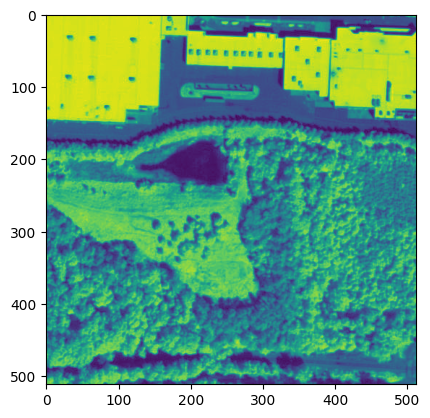

In [55]:
import random
import glob
# look at a random tile
img_filepath = random.choice(glob.glob('tiles/*.tif'))
with rio.open(img_filepath) as src:
    plot.show(src.read(4))

In [56]:
# from example
# select the training tiles from the tiled aerial imagery dataset
ts = dtr.TrainingSelector(img_dir='tiles')
split_df = ts.train_test_split(method='cluster-II')

[########################################] | 100% Completed | 245.73 s


/home/kfinity/mambaforge/envs/jlab310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kfinity/mambaforge/envs/jlab310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kfinity/mambaforge/envs/jlab310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kfinity/mambaforge/envs/jlab310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: Fut

In [57]:
split_df[split_df['train']]

,img_filepath,img_cluster,train
312,tiles/tile_18432-12288.tif,0,True
338,tiles/tile_21504-26112.tif,2,True
353,tiles/tile_28160-16896.tif,0,True
558,tiles/tile_0-10752.tif,0,True
586,tiles/tile_10240-15872.tif,0,True
678,tiles/tile_21504-8192.tif,0,True
704,tiles/tile_5120-7680.tif,1,True
766,tiles/tile_25600-28672.tif,0,True
877,tiles/tile_25088-23552.tif,0,True
880,tiles/tile_23552-18944.tif,0,True


In [ ]:
# train a tree/non-tree pixel classfier
clf = dtr.ClassifierTrainer().train_classifier(
    split_df=split_df, response_img_dir='data/response_tiles')
